# Business Case - To analyze electric vehicle market in India using segmentatation analysis to decide in which vehicle/ customer space it will develop its EV

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Loading the 1st dataset to analyze which type of vehicle the start-up should consider to enter the market using "Vehicle Type'(single veriable) of different model over the Years.

In [2]:
# loading the 1st dataset

ev=pd.read_csv('ev india.csv')

In [3]:
ev

,Year,Model,Units Sold,Vehicle Type,Usage Type,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,2019,Mahindra eVerito,434,4W,Passenger,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,Tata Tigor EV,389,4W,Passenger,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,Hyundai Kona Electric,227,4W,Passenger,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,Mahindra e2o Plus,21,4W,Passenger,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,Hero Electric Optima,26834,2W,Passenger,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023.0,Tata Motors,"Nexon EV, Tigor EV, Tiago EV","66,700",4W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2024,Dilli Electric E-Rickshaw,25043,3W,Commercial,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,2024,Tata Nexon EV,61435,4W,Passenger,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,2024,MG ZS EV,21464,4W,Passenger,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,2024,Mahindra XUV400,7104,4W,Passenger,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Renaming few columns according to veriable naming rules and for better readability

In [4]:
ev.rename(columns={'Units Sold':'units_sold','Vehicle Type':'vehicle_type','Usage Type':'usage_type'},inplace=True)

In [5]:
ev.drop([ 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30'],inplace=True,axis=1)

In [6]:
ev.columns

Index(['Year', 'Model', 'units_sold', 'vehicle_type', 'usage_type'], dtype='object')

In [7]:
ev.head()

,Year,Model,units_sold,vehicle_type,usage_type
0,2019,Mahindra eVerito,434,4W,Passenger
1,2019,Tata Tigor EV,389,4W,Passenger
2,2019,Hyundai Kona Electric,227,4W,Passenger
3,2019,Mahindra e2o Plus,21,4W,Passenger
4,2019,Hero Electric Optima,26834,2W,Passenger


In [8]:
ev.tail()

,Year,Model,units_sold,vehicle_type,usage_type
67,2024,Dilli Electric E-Rickshaw,25043,3W,Commercial
68,2024,Tata Nexon EV,61435,4W,Passenger
69,2024,MG ZS EV,21464,4W,Passenger
70,2024,Mahindra XUV400,7104,4W,Passenger
71,2024,BYD e6,2819,4W,Commercial


### Basic Checks

In [9]:
ev.describe()

,Year,units_sold
count,72.000000,72.000000
mean,2022.375000,67405.125000
std,1.771746,116139.760903
min,2019.000000,21.000000
25%,2021.000000,4915.750000
50%,2023.000000,28293.000000
75%,2024.000000,66509.000000
max,2024.000000,728054.000000


In [10]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          72 non-null     int64 
 1   Model         72 non-null     object
 2   units_sold    72 non-null     int64 
 3   vehicle_type  72 non-null     object
 4   usage_type    72 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.9+ KB


### EDA

#### Getting the graph of EV Sales In India over the year to check what type of vehicle was selled the most

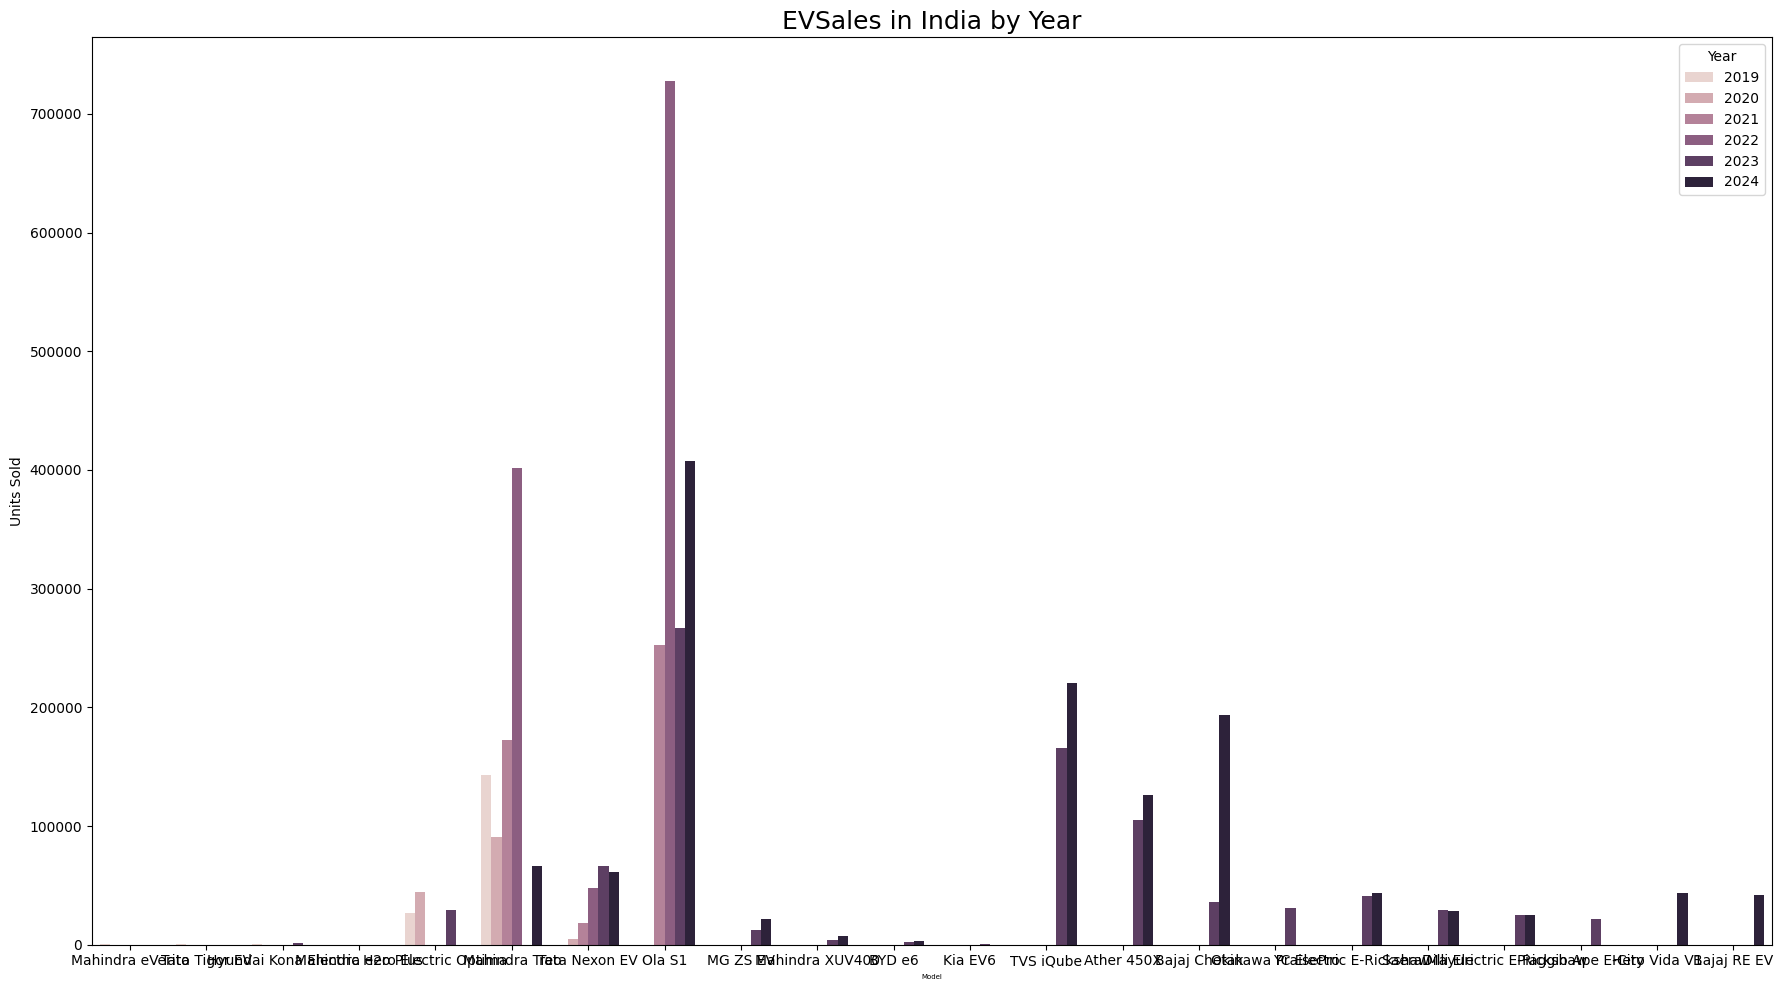

In [11]:
plt.figure(figsize=(18,10),facecolor='White')
sns.barplot(data=ev,x='Model',y='units_sold',hue='Year')
plt.title("EVSales in India by Year", fontsize=18)
plt.xlabel("Model",fontsize=5)
plt.ylabel("Units Sold",fontsize=10)
plt.tight_layout()
plt.show()

#### Checking the EV Sales in India over the Years by Vehicle Type

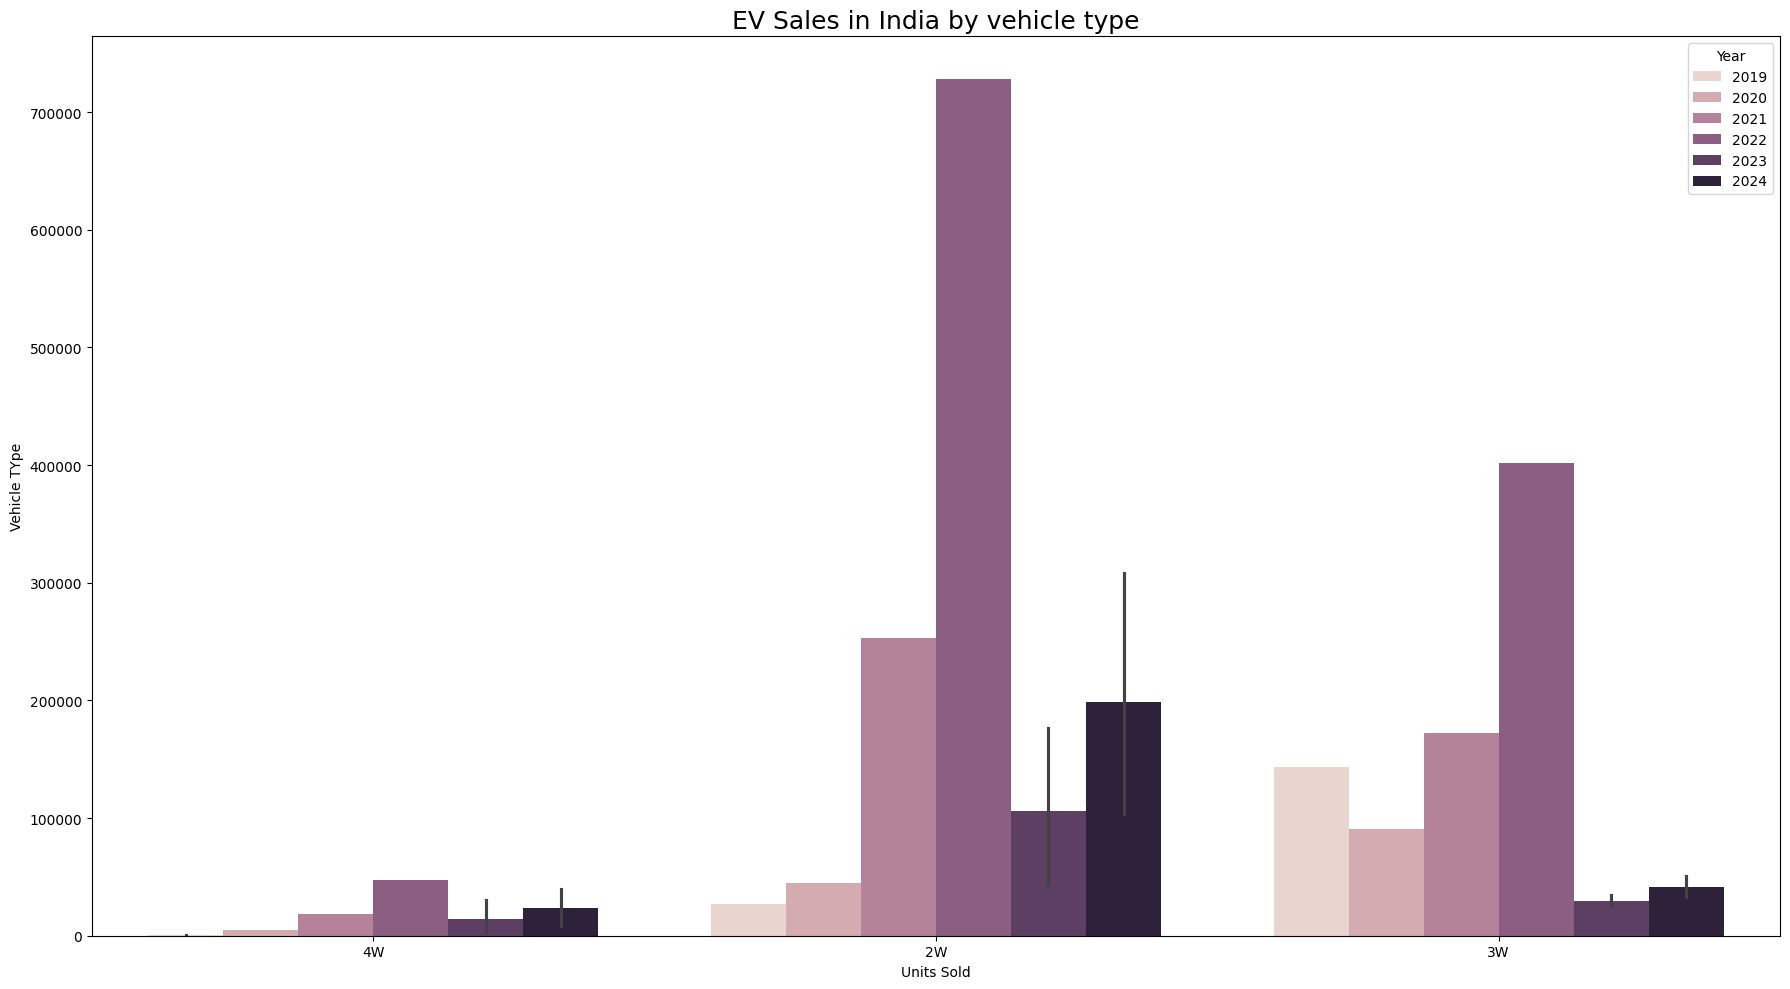

In [12]:
plt.figure(figsize=(18,10),facecolor='White')
sns.barplot(data=ev,x='vehicle_type',y='units_sold',hue='Year')
plt.title("EV Sales in India by vehicle type", fontsize=18)
plt.xlabel("Units Sold",fontsize=10)
plt.ylabel("Vehicle TYpe",fontsize=10)
plt.tight_layout()
plt.show()

#### Checking the EV Sales in India over the Years by Usage Type

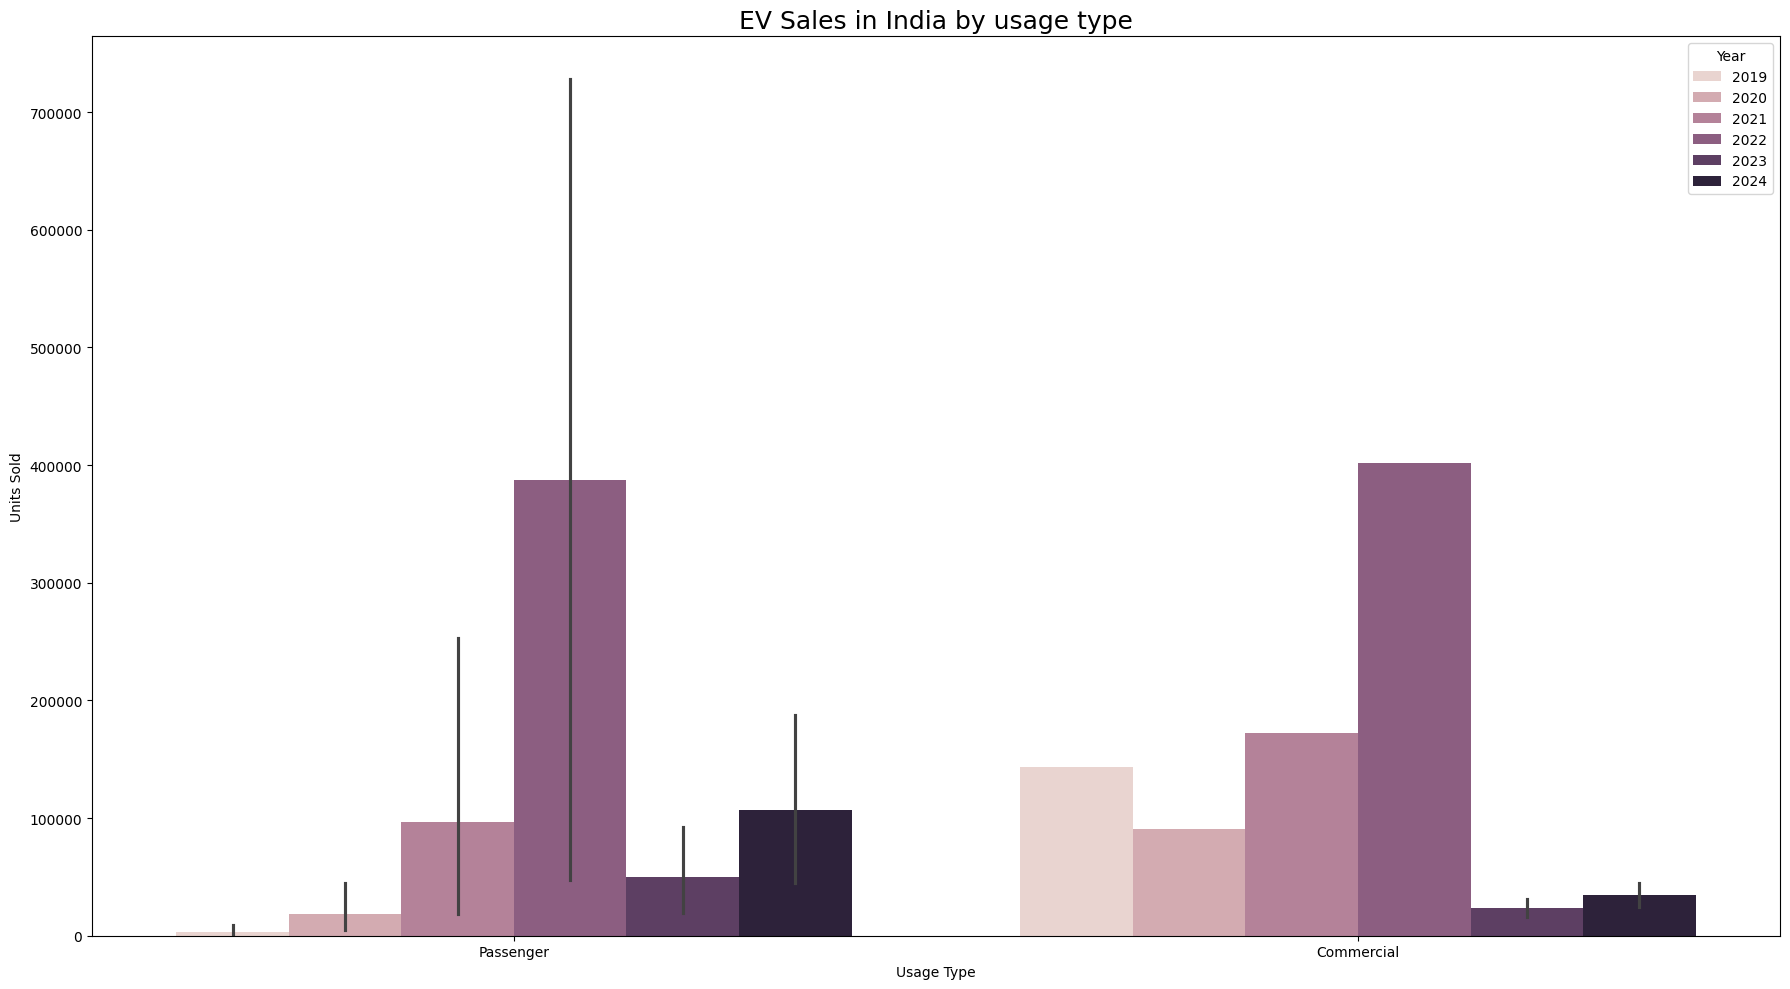

In [13]:
plt.figure(figsize=(18,10),facecolor='White')
sns.barplot(data=ev,x='usage_type',y='units_sold',hue='Year')
plt.title("EV Sales in India by usage type", fontsize=18)
plt.xlabel("Usage Type",fontsize=10)
plt.ylabel("Units Sold",fontsize=10)
plt.tight_layout()
plt.show()

#### Highest no of model in usage and vehicle type sold the most over the year

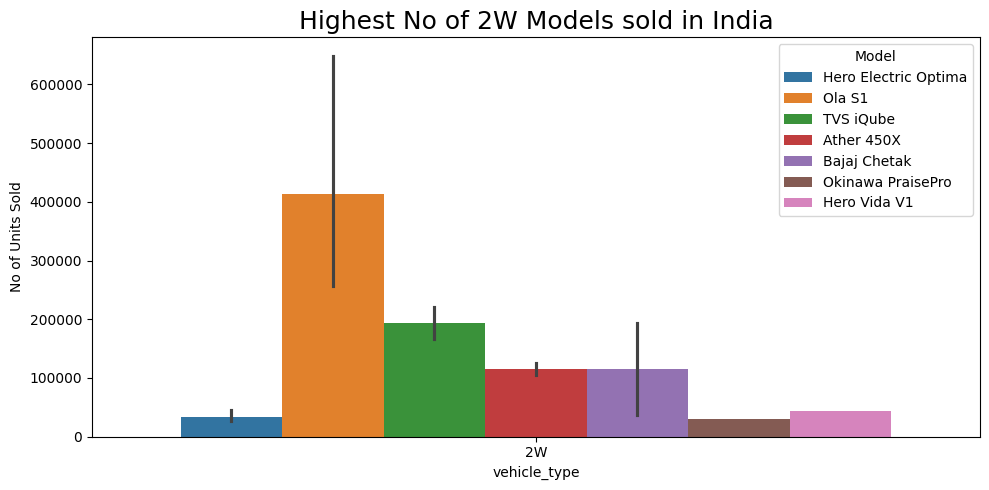

In [14]:
#creating veriables to check which model in usage and vehicle type sold the most over the year

model_2w=ev[ev['vehicle_type']=='2W']

plt.figure(figsize=(10,5))
sns.barplot(data=model_2w,x='vehicle_type',y='units_sold',hue='Model')
plt.title("Highest No of 2W Models sold in India", fontsize=18)
plt.xlabel("vehicle_type",fontsize=10)
plt.ylabel("No of Units Sold",fontsize=10)
plt.tight_layout()
plt.show()

#### Highest no of units sold in 3W model

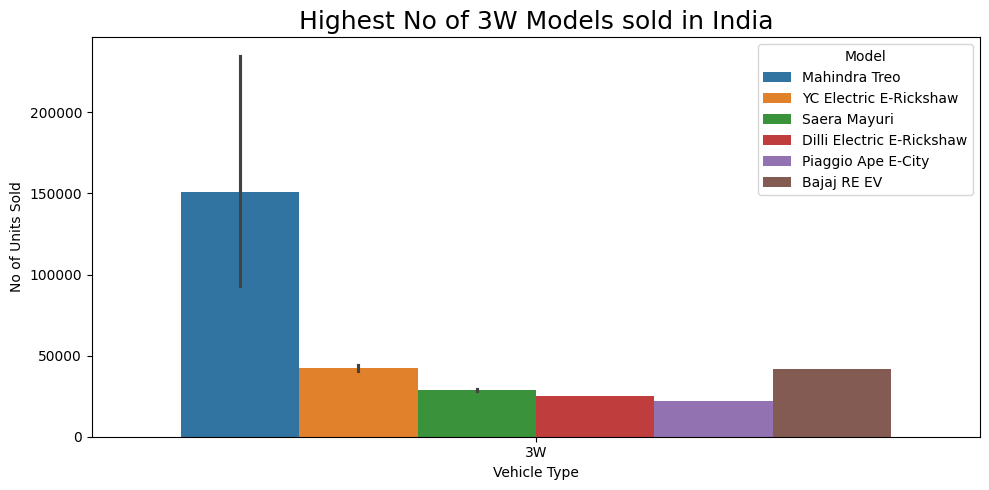

In [15]:
# similarly getting the highest no of units sold in 3W model

model_3w=ev[ev['vehicle_type']=='3W']

plt.figure(figsize=(10,5))
sns.barplot(data=model_3w,x='vehicle_type',y='units_sold',hue='Model')
plt.title("Highest No of 3W Models sold in India", fontsize=18)
plt.xlabel("Vehicle Type",fontsize=10)
plt.ylabel("No of Units Sold",fontsize=10)
plt.tight_layout()
plt.show()

#### Highest no of units sold in 4W model

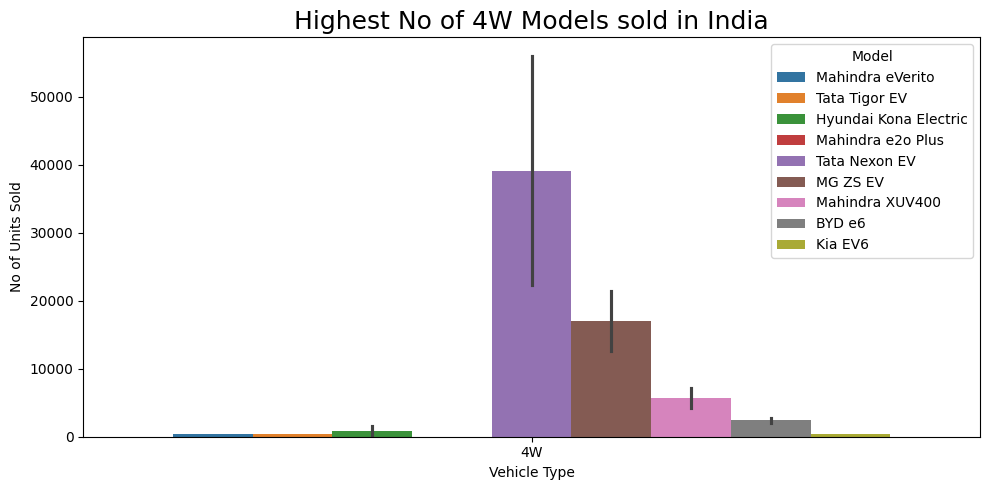

In [16]:
# similarly getting the highest no of units sold in 4W model

model_4w=ev[ev['vehicle_type']=='4W']

plt.figure(figsize=(10,5))
sns.barplot(data=model_4w,x='vehicle_type',y='units_sold',hue='Model')
plt.title("Highest No of 4W Models sold in India", fontsize=18)
plt.xlabel("Vehicle Type",fontsize=10)
plt.ylabel("No of Units Sold",fontsize=10)
plt.tight_layout()
plt.show()

#### Highest No of Commercial Model sold in India

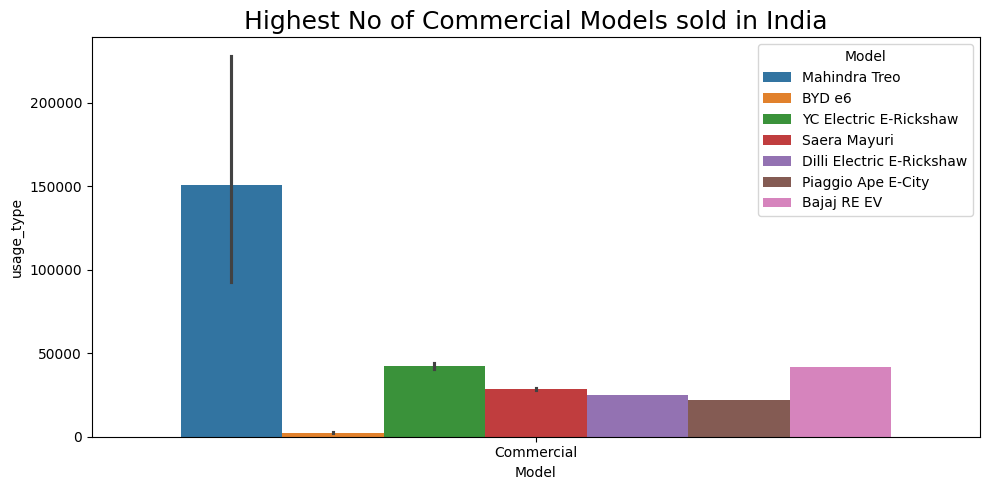

In [18]:
#creating veriables to check which model in usage and vehicle type sold the most over the year

model_comm=ev[ev['usage_type']=='Commercial']

plt.figure(figsize=(10,5))
sns.barplot(data=model_comm,x='usage_type',y='units_sold',hue='Model')
plt.title("Highest No of Commercial Models sold in India", fontsize=18)
plt.xlabel("Model",fontsize=10)
plt.ylabel("usage_type",fontsize=10)
plt.tight_layout()
plt.show()

#### Highest No of Passenger Models sold in India

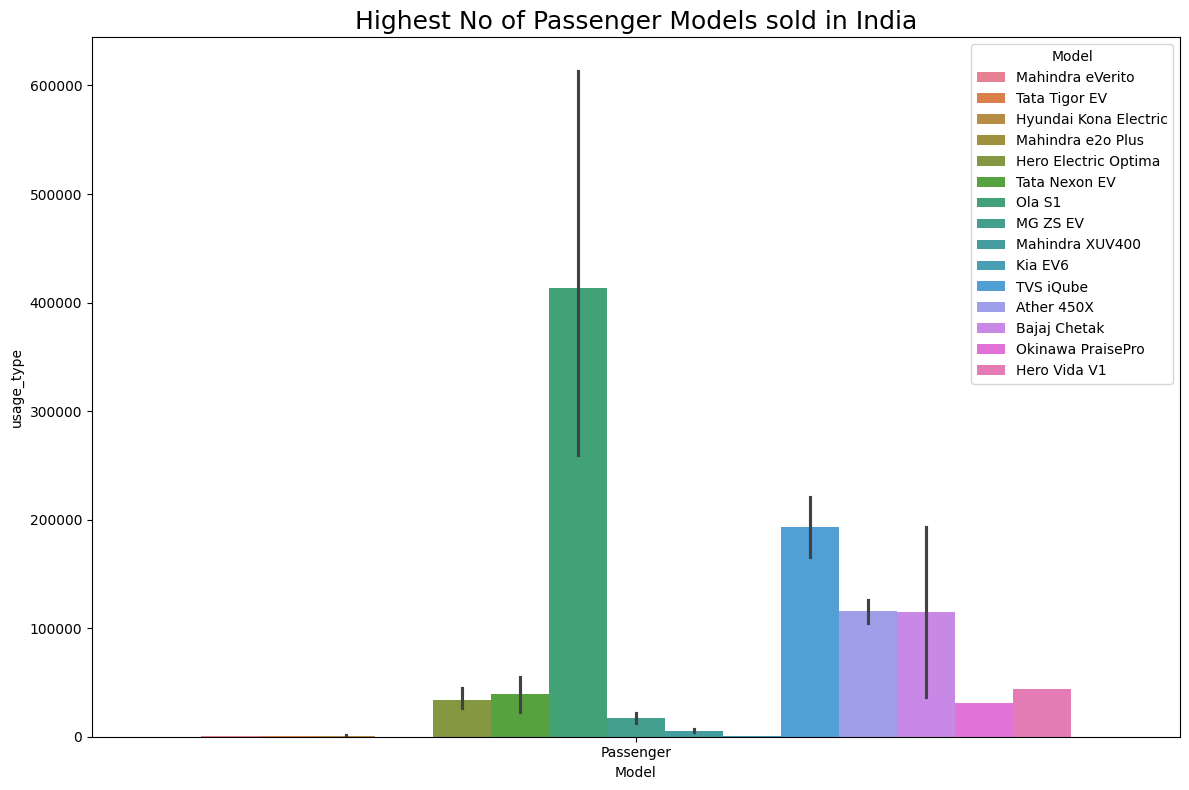

In [19]:
#creating veriables to check which model in usage and vehicle type sold the most over the year

model_pass=ev[ev['usage_type']=='Passenger']

plt.figure(figsize=(12,8))
sns.barplot(data=model_pass,x='usage_type',y='units_sold',hue='Model')
plt.title("Highest No of Passenger Models sold in India", fontsize=18)
plt.xlabel("Model",fontsize=10)
plt.ylabel("usage_type",fontsize=10)
plt.tight_layout()
plt.show()

## Preprocessing

In [20]:
#checking missing values

ev.isnull().sum()

Year            0
Model           0
units_sold      0
vehicle_type    0
usage_type      0
dtype: int64

In [21]:
# checking duplicates

ev.duplicated().sum()

27

In [22]:
#getting the duplicated values

ev.loc[ev.duplicated()==True]

,Year,Model,units_sold,vehicle_type,usage_type
5,2019,Mahindra eVerito,434,4W,Passenger
6,2019,Tata Tigor EV,389,4W,Passenger
7,2019,Hyundai Kona Electric,227,4W,Passenger
8,2019,Mahindra e2o Plus,21,4W,Passenger
13,2020,Tata Nexon EV,5154,4W,Passenger
14,2020,Mahindra Treo,90898,3W,Commercial
18,2021,Tata Nexon EV,18622,4W,Passenger
19,2021,Mahindra Treo,172543,3W,Commercial
39,2023,Tata Nexon EV,66700,4W,Passenger
40,2023,MG ZS EV,12600,4W,Passenger


In [23]:
# dropping the duplicate values

ev.drop_duplicates(inplace=True)

In [24]:
ev.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 62
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          45 non-null     int64 
 1   Model         45 non-null     object
 2   units_sold    45 non-null     int64 
 3   vehicle_type  45 non-null     object
 4   usage_type    45 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


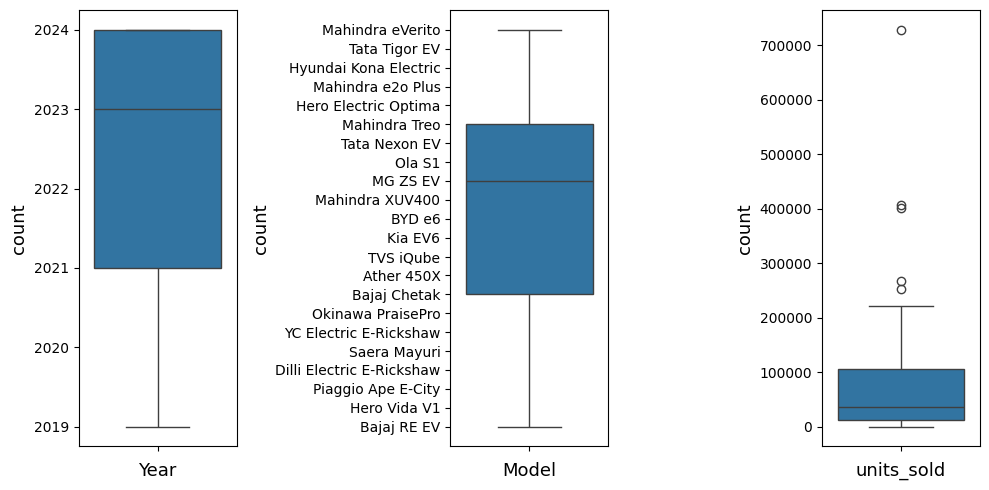

In [25]:
# checking for outliers as k means is highely impacted by outliers

plt.figure(figsize=(10,5),facecolor='white')
columnnum=1

for column in ev:
    if columnnum<=3:
        ax=plt.subplot(1,3,columnnum)
        sns.boxplot(ev[column])
        plt.xlabel(column,fontsize=13)
        plt.ylabel('count',fontsize=13)
    columnnum+=1
plt.tight_layout()

No outliers ditected

### Conversion of categorical veriable

In [26]:
# Conversion of categorical veriable

print(ev.Model.value_counts())
print('***************************')
print(ev.vehicle_type.value_counts())
print('***************************')
print(ev.usage_type.value_counts())

Model
Mahindra Treo                5
Tata Nexon EV                5
Ola S1                       4
Hero Electric Optima         3
MG ZS EV                     2
BYD e6                       2
Dilli Electric E-Rickshaw    2
Bajaj Chetak                 2
Ather 450X                   2
TVS iQube                    2
YC Electric E-Rickshaw       2
Mahindra XUV400              2
Saera Mayuri                 2
Hyundai Kona Electric        2
Piaggio Ape E-City           1
Hero Vida V1                 1
Mahindra eVerito             1
Kia EV6                      1
Okinawa PraisePro            1
Tata Tigor EV                1
Mahindra e2o Plus            1
Bajaj RE EV                  1
Name: count, dtype: int64
***************************
vehicle_type
4W    17
2W    15
3W    13
Name: count, dtype: int64
***************************
usage_type
Passenger     30
Commercial    15
Name: count, dtype: int64


In [27]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

ev.vehicle_type=encoder.fit_transform(ev.vehicle_type)

In [28]:
ev.head(5)

,Year,Model,units_sold,vehicle_type,usage_type
0,2019,Mahindra eVerito,434,2,Passenger
1,2019,Tata Tigor EV,389,2,Passenger
2,2019,Hyundai Kona Electric,227,2,Passenger
3,2019,Mahindra e2o Plus,21,2,Passenger
4,2019,Hero Electric Optima,26834,0,Passenger


In [29]:
# similarly converting the usage type as well

ev.usage_type=encoder.fit_transform(ev.usage_type)

In [30]:
ev.head(5)

,Year,Model,units_sold,vehicle_type,usage_type
0,2019,Mahindra eVerito,434,2,1
1,2019,Tata Tigor EV,389,2,1
2,2019,Hyundai Kona Electric,227,2,1
3,2019,Mahindra e2o Plus,21,2,1
4,2019,Hero Electric Optima,26834,0,1


In [31]:
ev.head()

,Year,Model,units_sold,vehicle_type,usage_type
0,2019,Mahindra eVerito,434,2,1
1,2019,Tata Tigor EV,389,2,1
2,2019,Hyundai Kona Electric,227,2,1
3,2019,Mahindra e2o Plus,21,2,1
4,2019,Hero Electric Optima,26834,0,1


### Model Creation

In [32]:
#creating a vericable to rearrange the dataframe making Model column As Index

pivot_df = ev.pivot_table(index='Model', columns='Year', values='units_sold', fill_value=0)

In [33]:
pivot_df

Year,2019,2020,2021,2022,2023,2024
Model,,,,,,
Ather 450X,0.0,0.0,0.0,0.0,105000.0,126173.0
BYD e6,0.0,0.0,0.0,0.0,1997.0,2819.0
Bajaj Chetak,0.0,0.0,0.0,0.0,36260.0,193460.0
Bajaj RE EV,0.0,0.0,0.0,0.0,0.0,41915.0
Dilli Electric E-Rickshaw,0.0,0.0,0.0,0.0,25000.0,25043.0
Hero Electric Optima,26834.0,44803.0,0.0,0.0,29396.0,0.0
Hero Vida V1,0.0,0.0,0.0,0.0,0.0,43696.0
Hyundai Kona Electric,227.0,0.0,0.0,0.0,1597.0,0.0
Kia EV6,0.0,0.0,0.0,0.0,436.0,0.0


### Scaling

In [34]:
# scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_df)

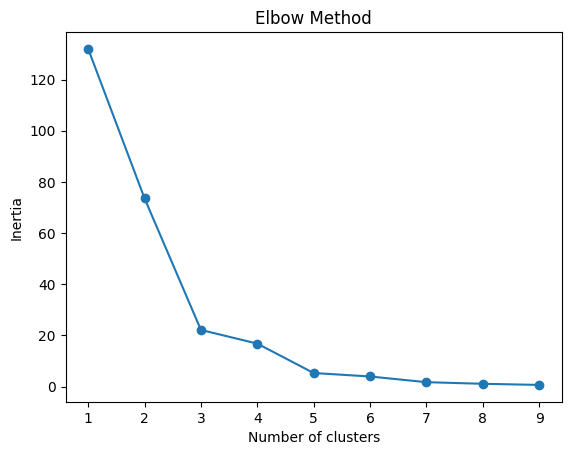

In [35]:
# doing k mean klustering to get more insights

from sklearn.cluster import KMeans


inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


We can see that at 3 its taking a sharp turn hence the k=3.

In [36]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

pivot_df['Cluster'] = clusters


In [37]:
# getting the mean for every custer
cluster_profiles = pivot_df.groupby('Cluster').mean()
print(cluster_profiles)


Year          2019      2020      2021       2022      2023       2024
Cluster                                                               
0          1395.25   2497.85     931.1    2374.95   28590.4   40794.55
1             0.00      0.00  252642.0  728054.00  267000.0  407553.00
2        143051.00  90898.00  172543.0  401882.00       0.0   66509.00


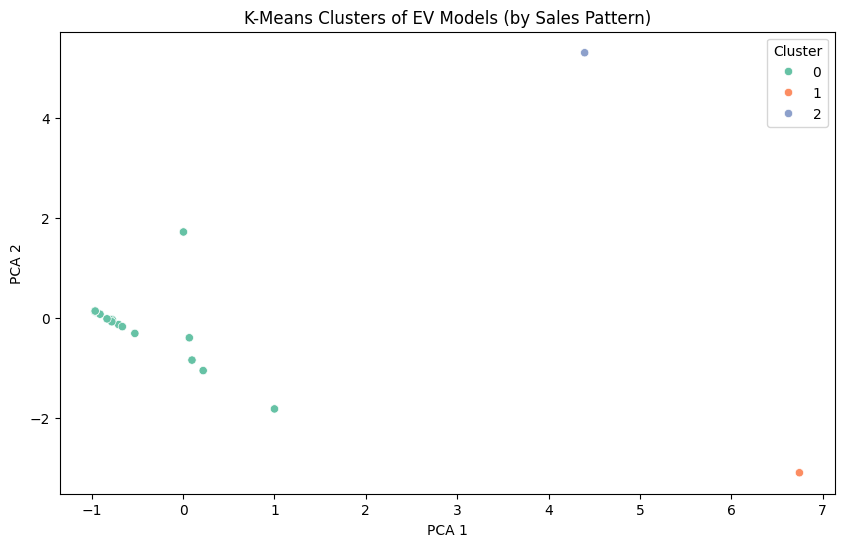

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=pivot_df['Cluster'], palette='Set2')
plt.title("K-Means Clusters of EV Models (by Sales Pattern)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [39]:
pivot_df.groupby('Cluster').mean()

Year,2019,2020,2021,2022,2023,2024
Cluster,,,,,,
0,1395.25,2497.85,931.1,2374.95,28590.4,40794.55
1,0.00,0.00,252642.0,728054.00,267000.0,407553.00
2,143051.00,90898.00,172543.0,401882.00,0.0,66509.00


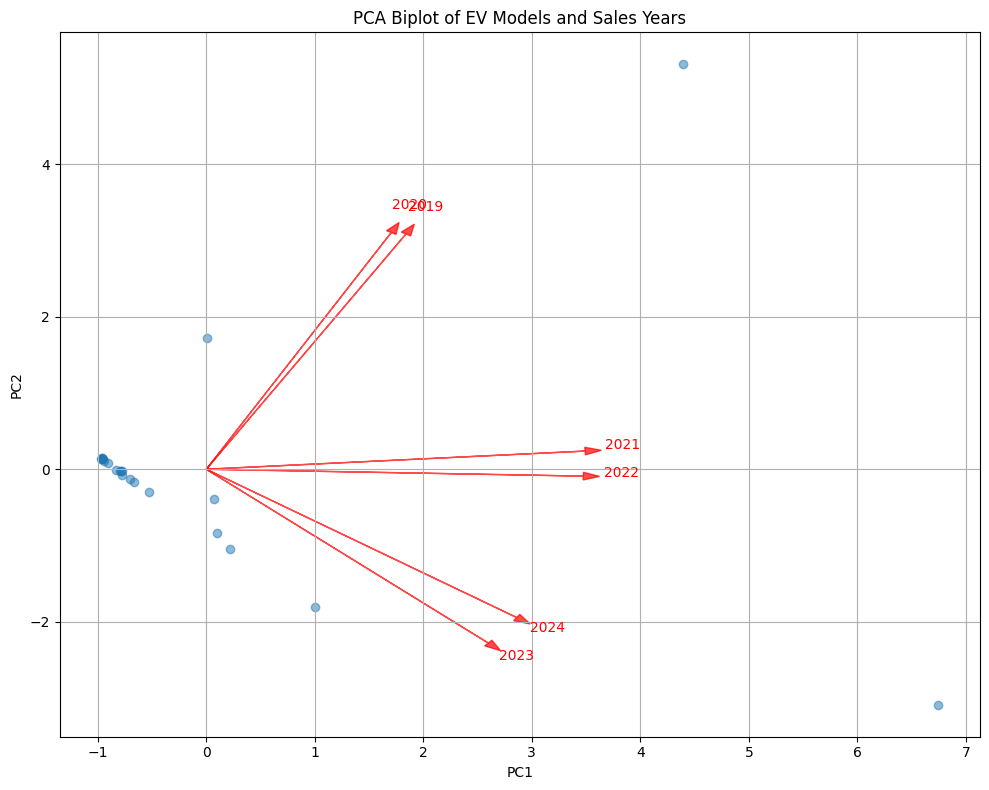

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
pca_result = pca.fit_transform(scaled_data)

# Create the biplot
plt.figure(figsize=(10, 8))

# Plot data points
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)

# Plot feature vectors (original variables like 2019, 2020...)
features = pivot_df.columns
for i in range(pca.components_.shape[1]):
    plt.arrow(0, 0, 
              pca.components_[0, i] * max(pca_result[:, 0]),
              pca.components_[1, i] * max(pca_result[:, 1]),
              color='red', alpha=0.7, head_width=0.1)
    plt.text(pca.components_[0, i] * max(pca_result[:, 0]) * 1.1,
             pca.components_[1, i] * max(pca_result[:, 1]) * 1.1,
             pivot_df.columns[i], color='red', ha='center', fontsize=10)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot of EV Models and Sales Years")
plt.grid()
plt.tight_layout()
plt.show()


The arrows (vectors) show how strongly each year contributes to the components:

2019–2020 are clustered together and point upward-right: These years influence PC1 and PC2 positively.

2021–2024 are spread out more horizontally and downward: Their directions suggest they distinguish EVs along PC1 more than PC2.

#### Loading the 2nd dataset to target the sales in India in Tier2 and tier 3 states using the demographic and geographic features like States,UTs, Per Capita Income, No of Graduates, Age etc

In [41]:
ev_dm=pd.read_csv('EV Demographic.csv')

In [42]:
ev_dm

,State/UT,Tier,Per Capita Income (?),% Graduates,% Postgraduates,% Informal Workers,% Aged 30?44,EV Penetration (%),Charging Stations,EV Manufacturing Presence,Power Supply Quality (Hours/Day),% Urban/Rural Classification,Vehicle Ownership Rate (2W/4W)
0,Andhra Pradesh,2,"1,53,234",33%,10%,57%,24%,1.30%,421,Yes,16,"Urban - 28%, Rural - 72%","2W - 80%, 4W - 15%"
1,Arunachal Pradesh,3,"1,64,105",28%,8%,62%,22%,0.40%,5,NaN,18,"Urban - 18%, Rural - 82%","2W - 85%, 4W - 5%"
2,Assam,2,"1,18,504",25%,7%,70%,15%,0.80%,86,NaN,14,"Urban - 20%, Rural - 80%","2W - 78%, 4W - 12%"
3,Bihar,3,"54,111",20%,5%,80%,10%,0.50%,124,NaN,12,"Urban - 12%, Rural - 88%","2W - 82%, 4W - 8%"
4,Chhattisgarh,2,"1,33,898",25%,6%,69%,16%,1.10%,149,NaN,15,"Urban - 22%, Rural - 78%","2W - 76%, 4W - 16%"
5,Delhi,2,"3,89,529",50%,20%,30%,35%,3.50%,1886,Yes,24,"Urban - 100%, Rural - 0%","2W - 85%, 4W - 10%"
6,Goa,2,"4,72,070",45%,18%,37%,32%,3.00%,44,Yes,22,"Urban - 50%, Rural - 50%","2W - 80%, 4W - 20%"
7,Gujarat,2,"2,41,930",32%,10%,58%,22%,1.60%,476,Yes,20,"Urban - 45%, Rural - 55%","2W - 75%, 4W - 18%"
8,Haryana,2,"2,96,685",38%,14%,48%,27%,1.80%,377,Yes,23,"Urban - 50%, Rural - 50%","2W - 82%, 4W - 12%"
9,Himachal Pradesh,3,"1,77,064",29%,8%,63%,19%,0.30%,36,NaN,16,"Urban - 22%, Rural - 78%","2W - 85%, 4W - 6%"


Renaming columns as per the rules and convinience

In [43]:
ev_dm.rename(columns={'Per Capita Income (?)':'per_capita_income','% Graduates':'no_of_graduates(%)',
                     '% Postgraduates':'no_of_postgraduates(%)','% Informal Workers':'no_of_informal_workers(%)',
                     '% Aged 30?44':'age_group30-40(%)','EV Penetration (%)':'EV_penetration(%)',
                     'Charging Stations':'charging_stations','EV Manufacturing Presence':'EV_manufacturing_presence',
                     'Power Supply Quality (Hours/Day)':'power_supply_quality(Hours/Day)','% Urban/Rural Classification':'urban/rural_classification(%)',
                     'Vehicle Ownership Rate (2W/4W)':'vehicle_ownership_rate(2W/4W in %)'},inplace=True)

In [44]:
ev_dm

,State/UT,Tier,per_capita_income,no_of_graduates(%),no_of_postgraduates(%),no_of_informal_workers(%),age_group30-40(%),EV_penetration(%),charging_stations,EV_manufacturing_presence,power_supply_quality(Hours/Day),urban/rural_classification(%),vehicle_ownership_rate(2W/4W in %)
0,Andhra Pradesh,2,"1,53,234",33%,10%,57%,24%,1.30%,421,Yes,16,"Urban - 28%, Rural - 72%","2W - 80%, 4W - 15%"
1,Arunachal Pradesh,3,"1,64,105",28%,8%,62%,22%,0.40%,5,NaN,18,"Urban - 18%, Rural - 82%","2W - 85%, 4W - 5%"
2,Assam,2,"1,18,504",25%,7%,70%,15%,0.80%,86,NaN,14,"Urban - 20%, Rural - 80%","2W - 78%, 4W - 12%"
3,Bihar,3,"54,111",20%,5%,80%,10%,0.50%,124,NaN,12,"Urban - 12%, Rural - 88%","2W - 82%, 4W - 8%"
4,Chhattisgarh,2,"1,33,898",25%,6%,69%,16%,1.10%,149,NaN,15,"Urban - 22%, Rural - 78%","2W - 76%, 4W - 16%"
5,Delhi,2,"3,89,529",50%,20%,30%,35%,3.50%,1886,Yes,24,"Urban - 100%, Rural - 0%","2W - 85%, 4W - 10%"
6,Goa,2,"4,72,070",45%,18%,37%,32%,3.00%,44,Yes,22,"Urban - 50%, Rural - 50%","2W - 80%, 4W - 20%"
7,Gujarat,2,"2,41,930",32%,10%,58%,22%,1.60%,476,Yes,20,"Urban - 45%, Rural - 55%","2W - 75%, 4W - 18%"
8,Haryana,2,"2,96,685",38%,14%,48%,27%,1.80%,377,Yes,23,"Urban - 50%, Rural - 50%","2W - 82%, 4W - 12%"
9,Himachal Pradesh,3,"1,77,064",29%,8%,63%,19%,0.30%,36,NaN,16,"Urban - 22%, Rural - 78%","2W - 85%, 4W - 6%"


### Basic Checks

In [45]:
ev_dm.head() #getting 1st 5 rows

,State/UT,Tier,per_capita_income,no_of_graduates(%),no_of_postgraduates(%),no_of_informal_workers(%),age_group30-40(%),EV_penetration(%),charging_stations,EV_manufacturing_presence,power_supply_quality(Hours/Day),urban/rural_classification(%),vehicle_ownership_rate(2W/4W in %)
0,Andhra Pradesh,2,"1,53,234",33%,10%,57%,24%,1.30%,421,Yes,16,"Urban - 28%, Rural - 72%","2W - 80%, 4W - 15%"
1,Arunachal Pradesh,3,"1,64,105",28%,8%,62%,22%,0.40%,5,NaN,18,"Urban - 18%, Rural - 82%","2W - 85%, 4W - 5%"
2,Assam,2,"1,18,504",25%,7%,70%,15%,0.80%,86,NaN,14,"Urban - 20%, Rural - 80%","2W - 78%, 4W - 12%"
3,Bihar,3,"54,111",20%,5%,80%,10%,0.50%,124,NaN,12,"Urban - 12%, Rural - 88%","2W - 82%, 4W - 8%"
4,Chhattisgarh,2,"1,33,898",25%,6%,69%,16%,1.10%,149,NaN,15,"Urban - 22%, Rural - 78%","2W - 76%, 4W - 16%"


In [46]:
ev_dm.tail()#$getting last 5 rows

,State/UT,Tier,per_capita_income,no_of_graduates(%),no_of_postgraduates(%),no_of_informal_workers(%),age_group30-40(%),EV_penetration(%),charging_stations,EV_manufacturing_presence,power_supply_quality(Hours/Day),urban/rural_classification(%),vehicle_ownership_rate(2W/4W in %)
30,Andaman & Nicobar Islands,3,"1,50,000",29%,9%,60%,20%,0.50%,10,No,18,"Urban - 35%, Rural - 65%","2W - 75%, 4W - 10%"
31,Chandigarh,2,"3,90,000",50%,20%,30%,35%,14.80%,20,Yes,24,"Urban - 100%, Rural - 0%","2W - 85%, 4W - 10%"
32,Dadra & Nagar Haveli and Daman & Diu,3,"1,80,000",22%,6%,70%,18%,0.60%,15,No,16,"Urban - 40%, Rural - 60%","2W - 80%, 4W - 12%"
33,Lakshadweep,3,"1,60,000",25%,7%,65%,17%,0.40%,5,No,20,"Urban - 50%, Rural - 50%","2W - 70%, 4W - 8%"
34,Puducherry,2,"2,20,000",35%,10%,55%,22%,1.20%,25,Yes,22,"Urban - 70%, Rural - 30%","2W - 78%, 4W - 15%"


In [47]:
ev_dm.columns

Index(['State/UT', 'Tier', 'per_capita_income', 'no_of_graduates(%)',
       'no_of_postgraduates(%)', 'no_of_informal_workers(%)',
       'age_group30-40(%)', 'EV_penetration(%)', 'charging_stations',
       'EV_manufacturing_presence', 'power_supply_quality(Hours/Day)',
       'urban/rural_classification(%)', 'vehicle_ownership_rate(2W/4W in %)'],
      dtype='object')

In [48]:
ev_dm.shape

(35, 13)

In [49]:
ev_dm.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State/UT                            35 non-null     object
 1   Tier                                35 non-null     int64 
 2   per_capita_income                   35 non-null     object
 3   no_of_graduates(%)                  35 non-null     object
 4   no_of_postgraduates(%)              35 non-null     object
 5   no_of_informal_workers(%)           35 non-null     object
 6   age_group30-40(%)                   35 non-null     object
 7   EV_penetration(%)                   35 non-null     object
 8   charging_stations                   35 non-null     int64 
 9   EV_manufacturing_presence           16 non-null     object
 10  power_supply_quality(Hours/Day)     35 non-null     int64 
 11  urban/rural_classification(%)       35 non-null     object
 

In [50]:
ev_dm.describe() #getting info on numeric veriabes

,Tier,charging_stations,power_supply_quality(Hours/Day)
count,35.000000,35.000000,35.000000
mean,2.428571,338.200000,17.914286
std,0.502096,605.462915,3.649105
min,2.000000,5.000000,12.000000
25%,2.000000,19.000000,15.000000
50%,2.000000,124.000000,18.000000
75%,3.000000,433.000000,21.000000
max,3.000000,3079.000000,24.000000


In [51]:
ev_dm.describe(include='O').T #getting info on categorical veriabes

,count,unique,top,freq
State/UT,35,35,Andhra Pradesh,1
per_capita_income,35,35,"1,53,234",1
no_of_graduates(%),35,16,25%,4
no_of_postgraduates(%),35,15,10%,4
no_of_informal_workers(%),35,25,70%,2
age_group30-40(%),35,20,22%,4
EV_penetration(%),35,20,0.40%,4
EV_manufacturing_presence,16,2,Yes,13
urban/rural_classification(%),35,19,"Urban - 10%, Rural - 90%",4
vehicle_ownership_rate(2W/4W in %),35,25,"2W - 85%, 4W - 10%",4


### EDA

In [52]:
ev_dm.head(1)

,State/UT,Tier,per_capita_income,no_of_graduates(%),no_of_postgraduates(%),no_of_informal_workers(%),age_group30-40(%),EV_penetration(%),charging_stations,EV_manufacturing_presence,power_supply_quality(Hours/Day),urban/rural_classification(%),vehicle_ownership_rate(2W/4W in %)
0,Andhra Pradesh,2,"1,53,234",33%,10%,57%,24%,1.30%,421,Yes,16,"Urban - 28%, Rural - 72%","2W - 80%, 4W - 15%"


## Getting the relationship between 2 veriables and how one veriable is correlated to the other


#### EV penetration in states according to per capita Income

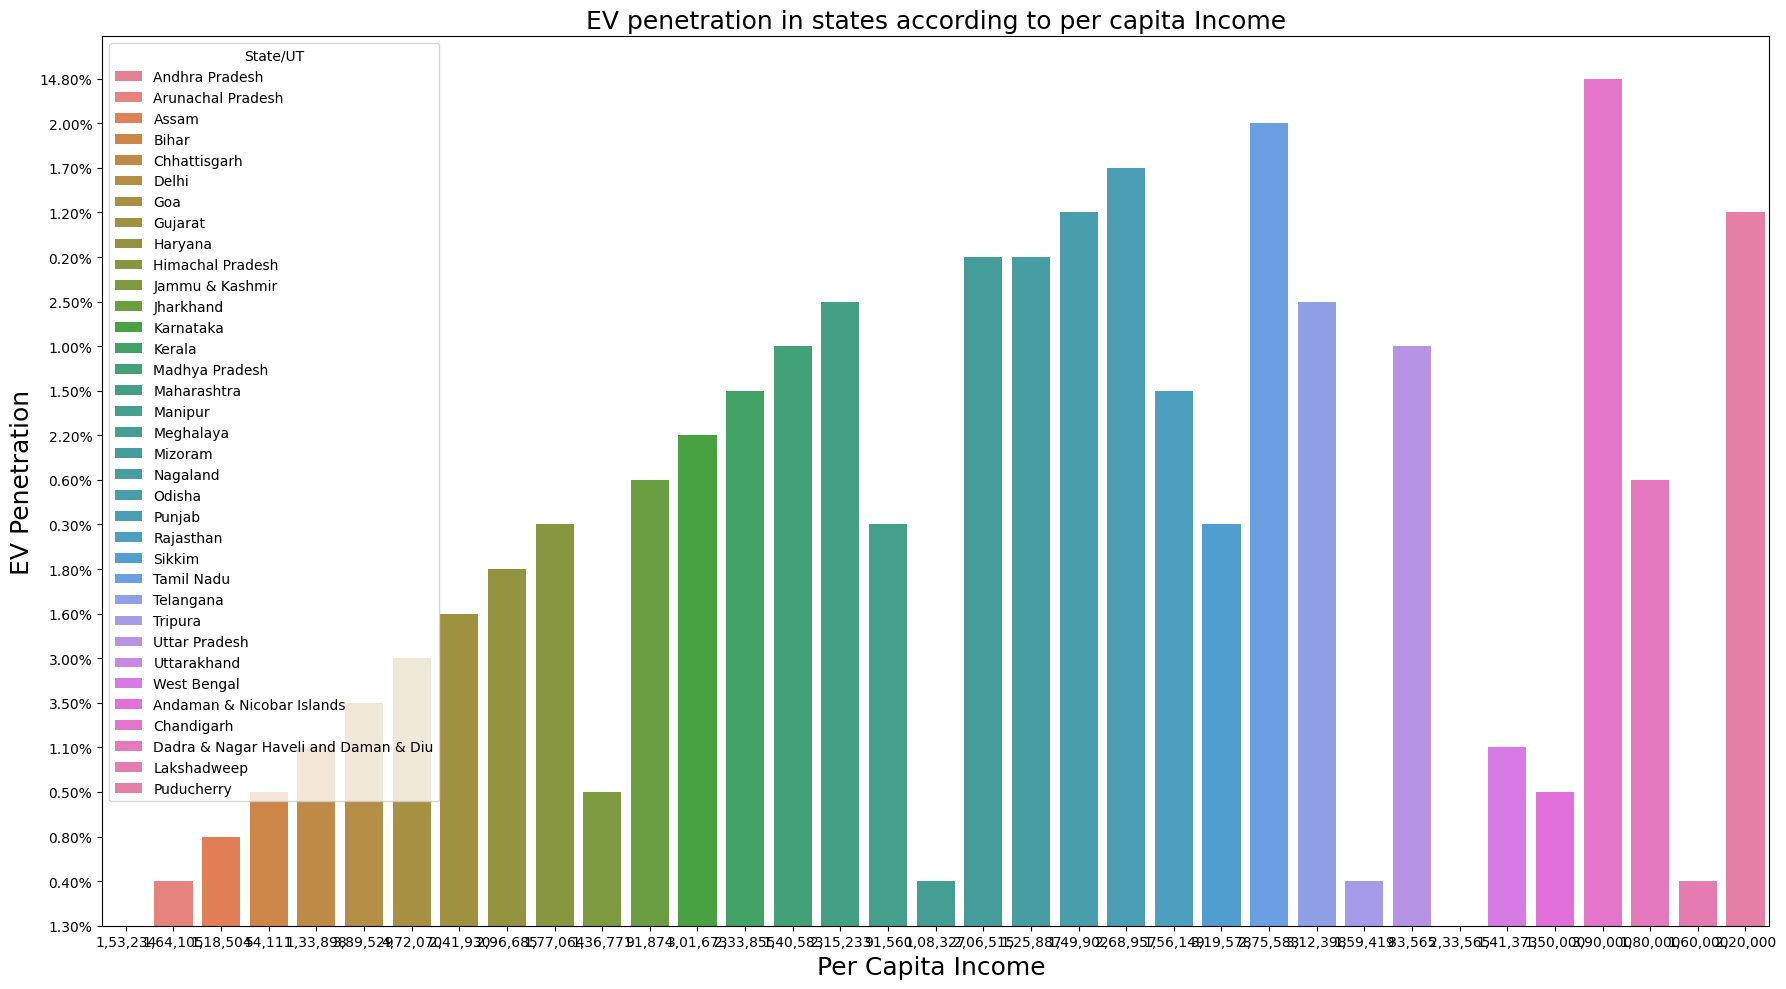

In [53]:
#getting the relationship between 2 veriables and how one veriable is correlated to the other

plt.figure(figsize=(18,10),facecolor='White')
sns.barplot(data=ev_dm,x='per_capita_income',y='EV_penetration(%)',hue='State/UT')
plt.gca().invert_yaxis()
plt.title("EV penetration in states according to per capita Income", fontsize=18)
plt.xlabel("Per Capita Income ",fontsize=18)
plt.ylabel("EV Penetration",fontsize=18)
plt.tight_layout()
plt.show()

#### EV penetration in states based on No of Graduates

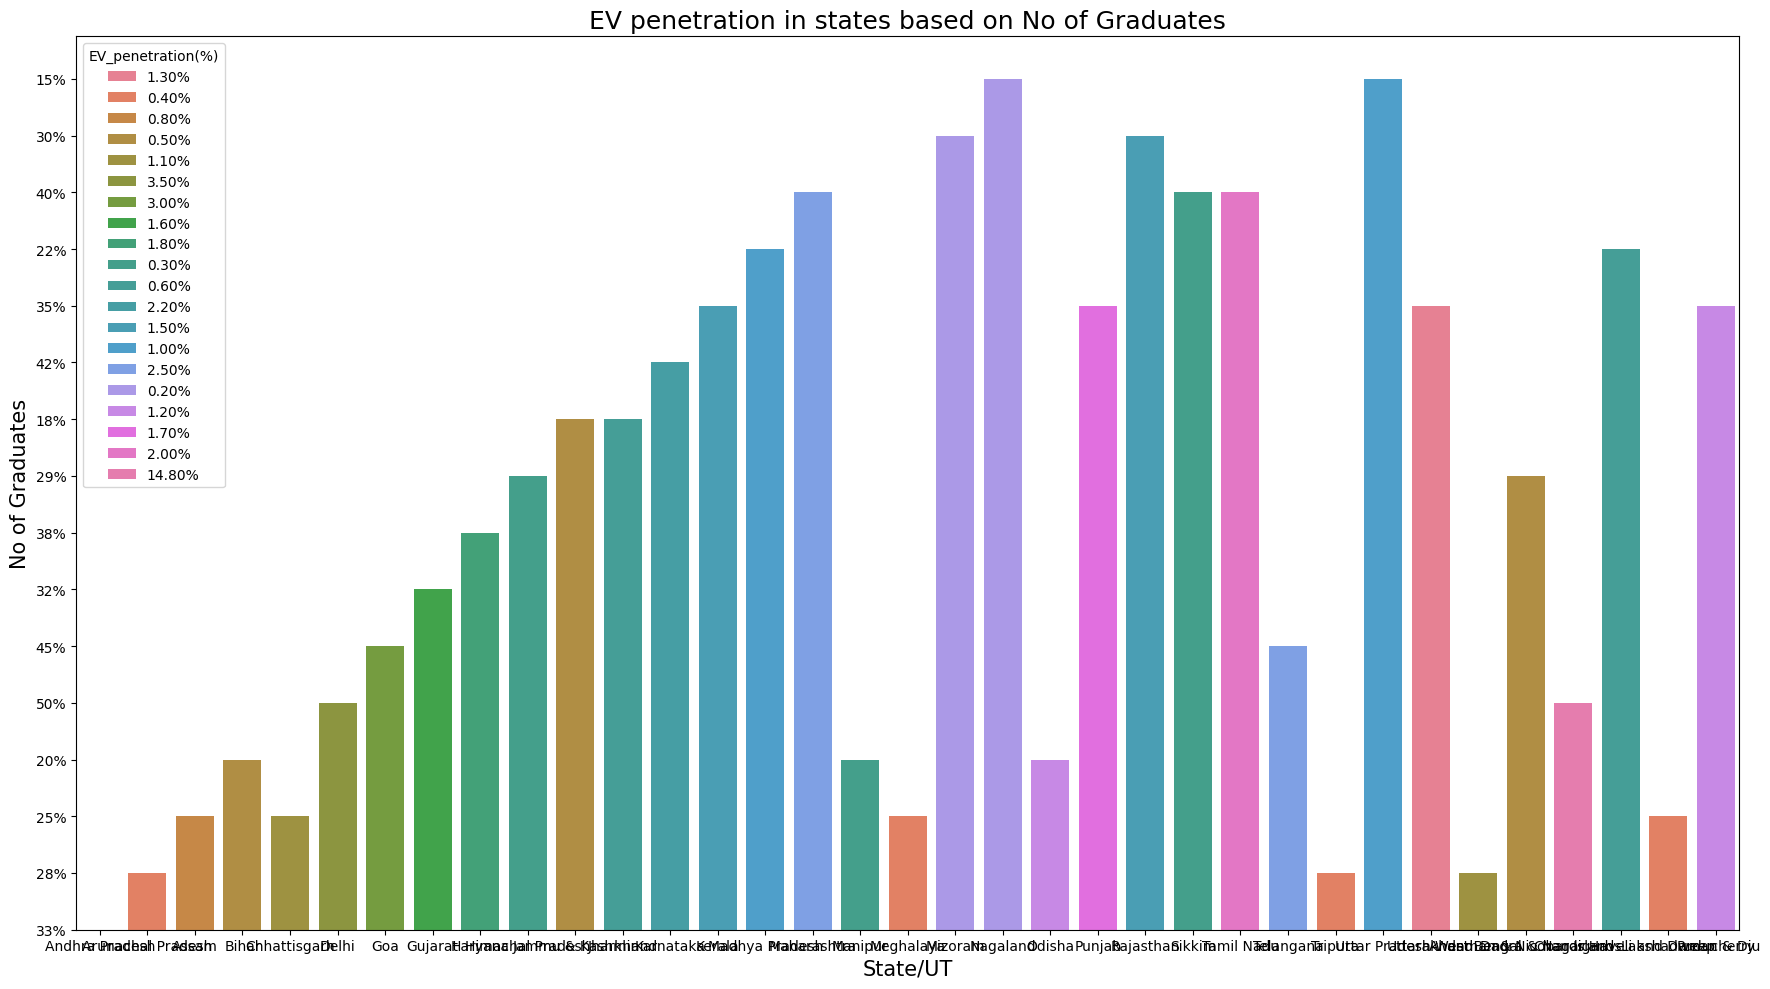

In [55]:
plt.figure(figsize=(18,10),facecolor='White')
sns.barplot(data=ev_dm, x='State/UT', y='no_of_graduates(%)',hue='EV_penetration(%)')
plt.gca().invert_yaxis()
plt.title("EV penetration in states based on No of Graduates",size=18)
plt.xlabel("State/UT",fontsize=15)
plt.ylabel("No of Graduates",fontsize=15)
plt.tight_layout()
plt.show()

1. State like Nagaland, Sikkim and Meghalay shows more than 50% of graduates rate.
2. Arunachal Pradesh shows lowest graduation rate at aroud 28%.
3. Even though State like Nagaland, Sikkim and Meghalay has more than 50% of graduates rate it still shows EV penetration below 0.8%
due various geographical reasons.
4. Whereas State like Delhi,Andaman & Nicobar and Chandigarh has less than 30% graduation rate but still has high EV penetration rate.
5. We can say that  Eduaction affects the EV penetration rate to some extent but we cannot be entirely depend on this factor.

#### Impact of Occupation(No of Informal Workers) on EV Penetration

1. Informal jobs include agriculture and natural jobs like farming, horticulture, forestry, and fishing are often part of the informal sector.
2. Informal jobs lack formal contracts, job security, and legal protections. Workers usually don’t receive benefits like health insurance or pensions and
Jobs are often unregistered and paid in cash, with no official record. Examples include street vending, domestic work, construction, and small shops.
These jobs are usually small-scale, seasonal, or family-run, contributing to their informal status.


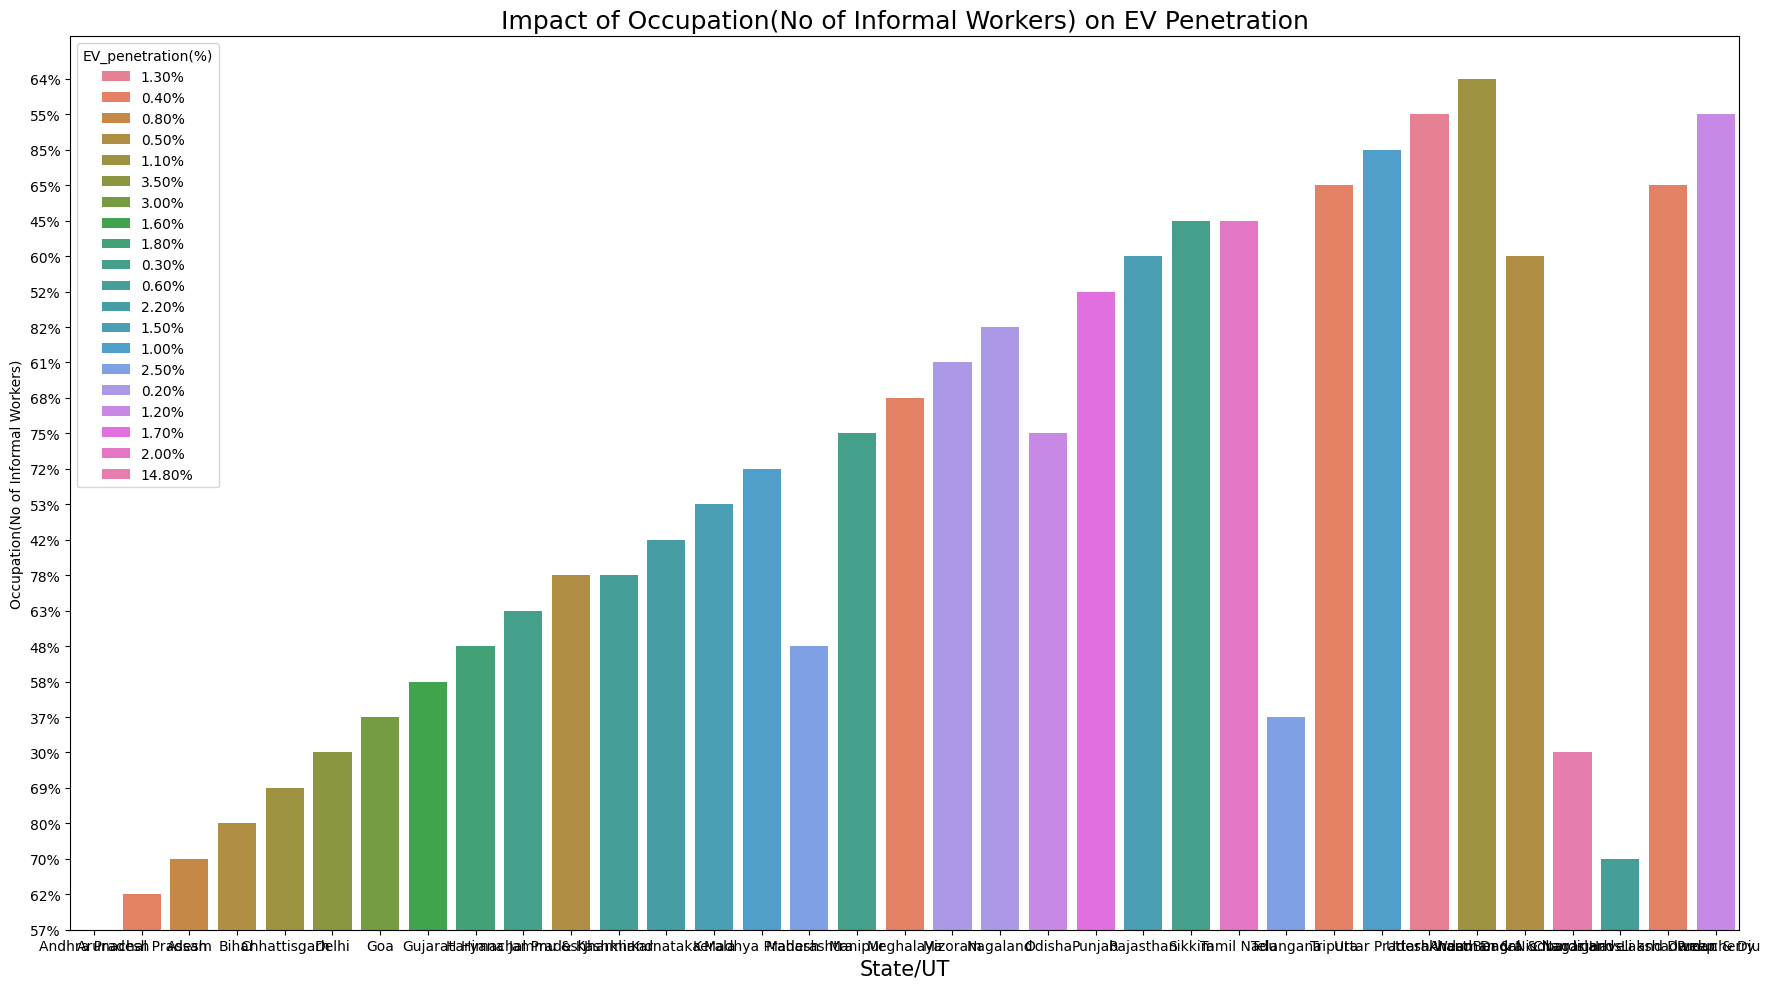

In [56]:
plt.figure(figsize=(18,10),facecolor='White')
sns.barplot(data=ev_dm, x='State/UT', y='no_of_informal_workers(%)',hue='EV_penetration(%)')
plt.gca().invert_yaxis()
plt.title("Impact of Occupation(No of Informal Workers) on EV Penetration",size=18)
plt.xlabel("State/UT",fontsize=15)
plt.ylabel("Occupation(No of Informal Workers)",fontsize=10)
plt.tight_layout()
plt.show()

Insights
1. Graph shows that Nagaland has the highest percentage of informal workers (above 85%) thus showing lower EV penetration rate (e.g., ~0.2% to 1.5%) likely due to lower purchasing power,
lack of credit access, and weak formal financing structures.This could be due to Nagaland is predominantly rural and has agrarian economy.
other resons can be Limited presence of formal industries or private sector jobs and Heavy reliance on self-employment and traditional livelihoods.
2. States like Karnataka, Madhya Pradesh, and Odisha have moderate levels of informal workforce (around 60–70%). Main resons for moderate informal workers and EV penetration can be 
Mix of urban centers and rural areas. Presence of both formal employment (in urban cities like Bengaluru or Bhopal) and informal (in agriculture or construction). Therefore these 
states benefit from partial urban infrastructure and growing EV incentives.
3. States like Andhra Pradesh, Arunachal Pradesh, and Bihar have the lowest percentage (around or below 30–35%).
4. Union Territory like Chandigrh has good EV penetration rate at 14.8% due to Urbanization and better infrastructure. Greater access to credit and government schemes.More awareness and availability of EVs.

#### EV penetration in states according to Charging Stations

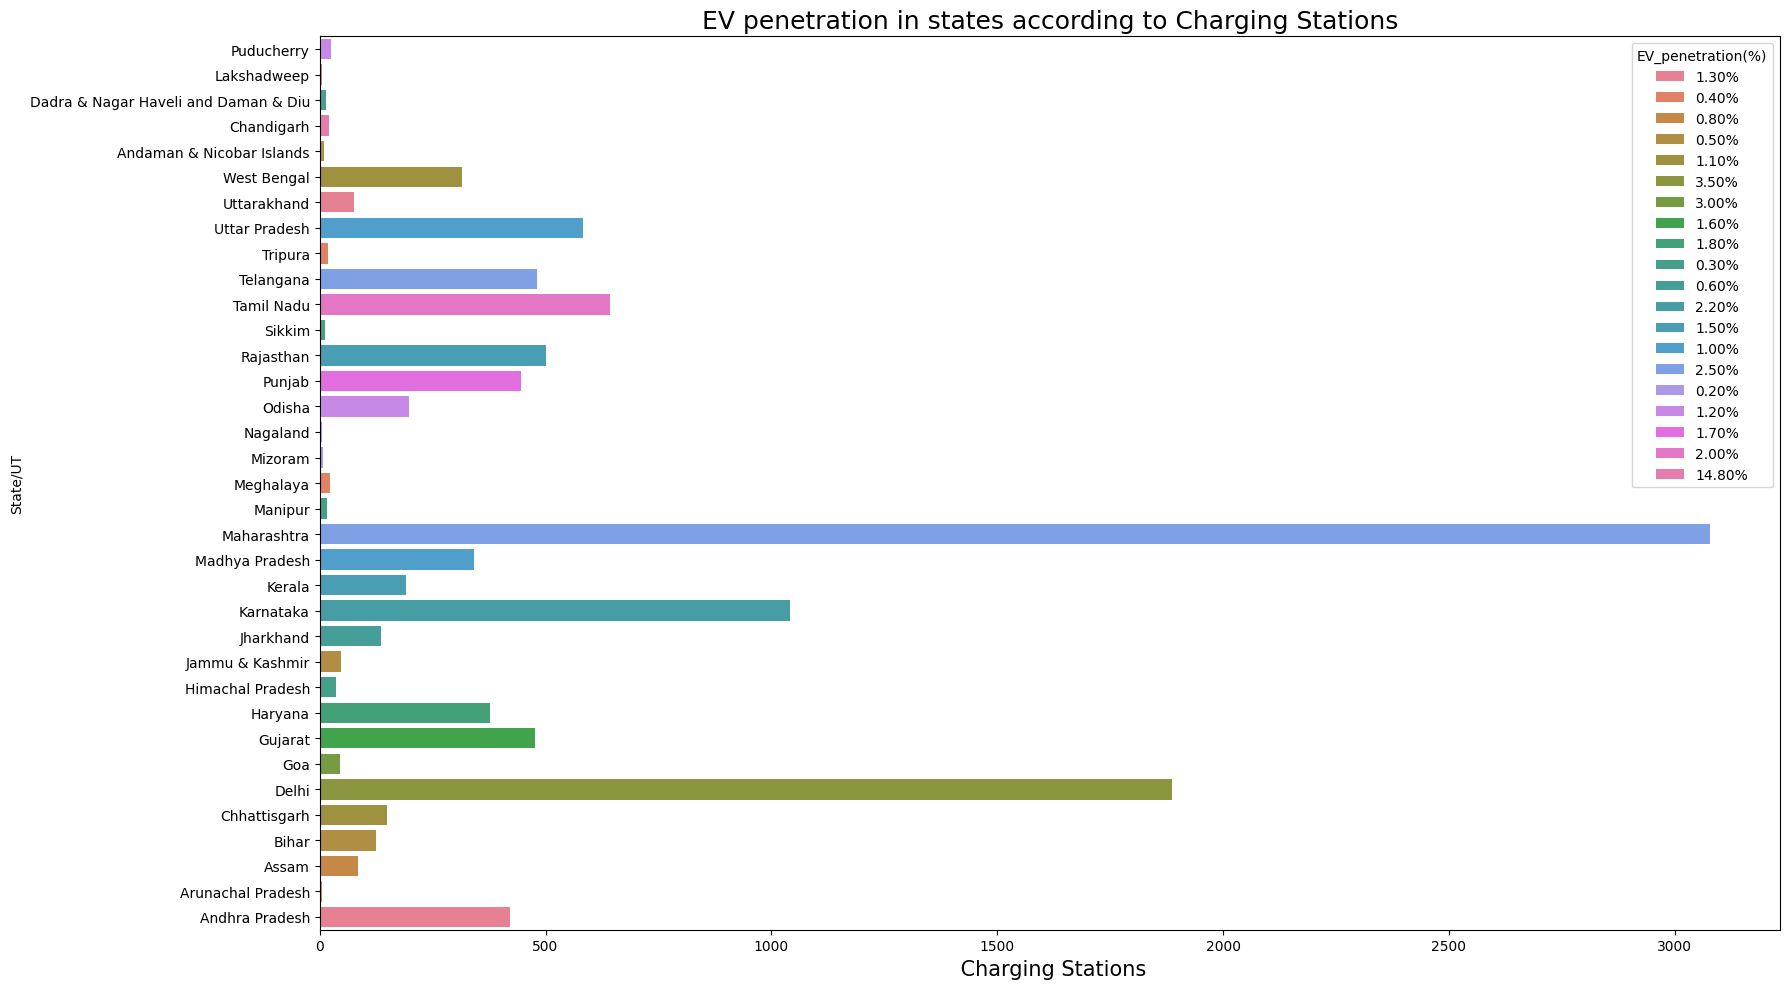

In [57]:
plt.figure(figsize=(18,10),facecolor='White')
sns.barplot(data=ev_dm, x='charging_stations', y='State/UT',hue='EV_penetration(%)')
plt.gca().invert_yaxis()
plt.title("EV penetration in states according to Charging Stations",size=18)
plt.xlabel(" Charging Stations",fontsize=15)
plt.ylabel("State/UT",fontsize=10)
plt.tight_layout()
plt.show()

In [58]:
ev_dm.columns

Index(['State/UT', 'Tier', 'per_capita_income', 'no_of_graduates(%)',
       'no_of_postgraduates(%)', 'no_of_informal_workers(%)',
       'age_group30-40(%)', 'EV_penetration(%)', 'charging_stations',
       'EV_manufacturing_presence', 'power_supply_quality(Hours/Day)',
       'urban/rural_classification(%)', 'vehicle_ownership_rate(2W/4W in %)'],
      dtype='object')

In [59]:
ev_dm.head(5)

,State/UT,Tier,per_capita_income,no_of_graduates(%),no_of_postgraduates(%),no_of_informal_workers(%),age_group30-40(%),EV_penetration(%),charging_stations,EV_manufacturing_presence,power_supply_quality(Hours/Day),urban/rural_classification(%),vehicle_ownership_rate(2W/4W in %)
0,Andhra Pradesh,2,"1,53,234",33%,10%,57%,24%,1.30%,421,Yes,16,"Urban - 28%, Rural - 72%","2W - 80%, 4W - 15%"
1,Arunachal Pradesh,3,"1,64,105",28%,8%,62%,22%,0.40%,5,NaN,18,"Urban - 18%, Rural - 82%","2W - 85%, 4W - 5%"
2,Assam,2,"1,18,504",25%,7%,70%,15%,0.80%,86,NaN,14,"Urban - 20%, Rural - 80%","2W - 78%, 4W - 12%"
3,Bihar,3,"54,111",20%,5%,80%,10%,0.50%,124,NaN,12,"Urban - 12%, Rural - 88%","2W - 82%, 4W - 8%"
4,Chhattisgarh,2,"1,33,898",25%,6%,69%,16%,1.10%,149,NaN,15,"Urban - 22%, Rural - 78%","2W - 76%, 4W - 16%"


#### EV Manufacturing Presence in states

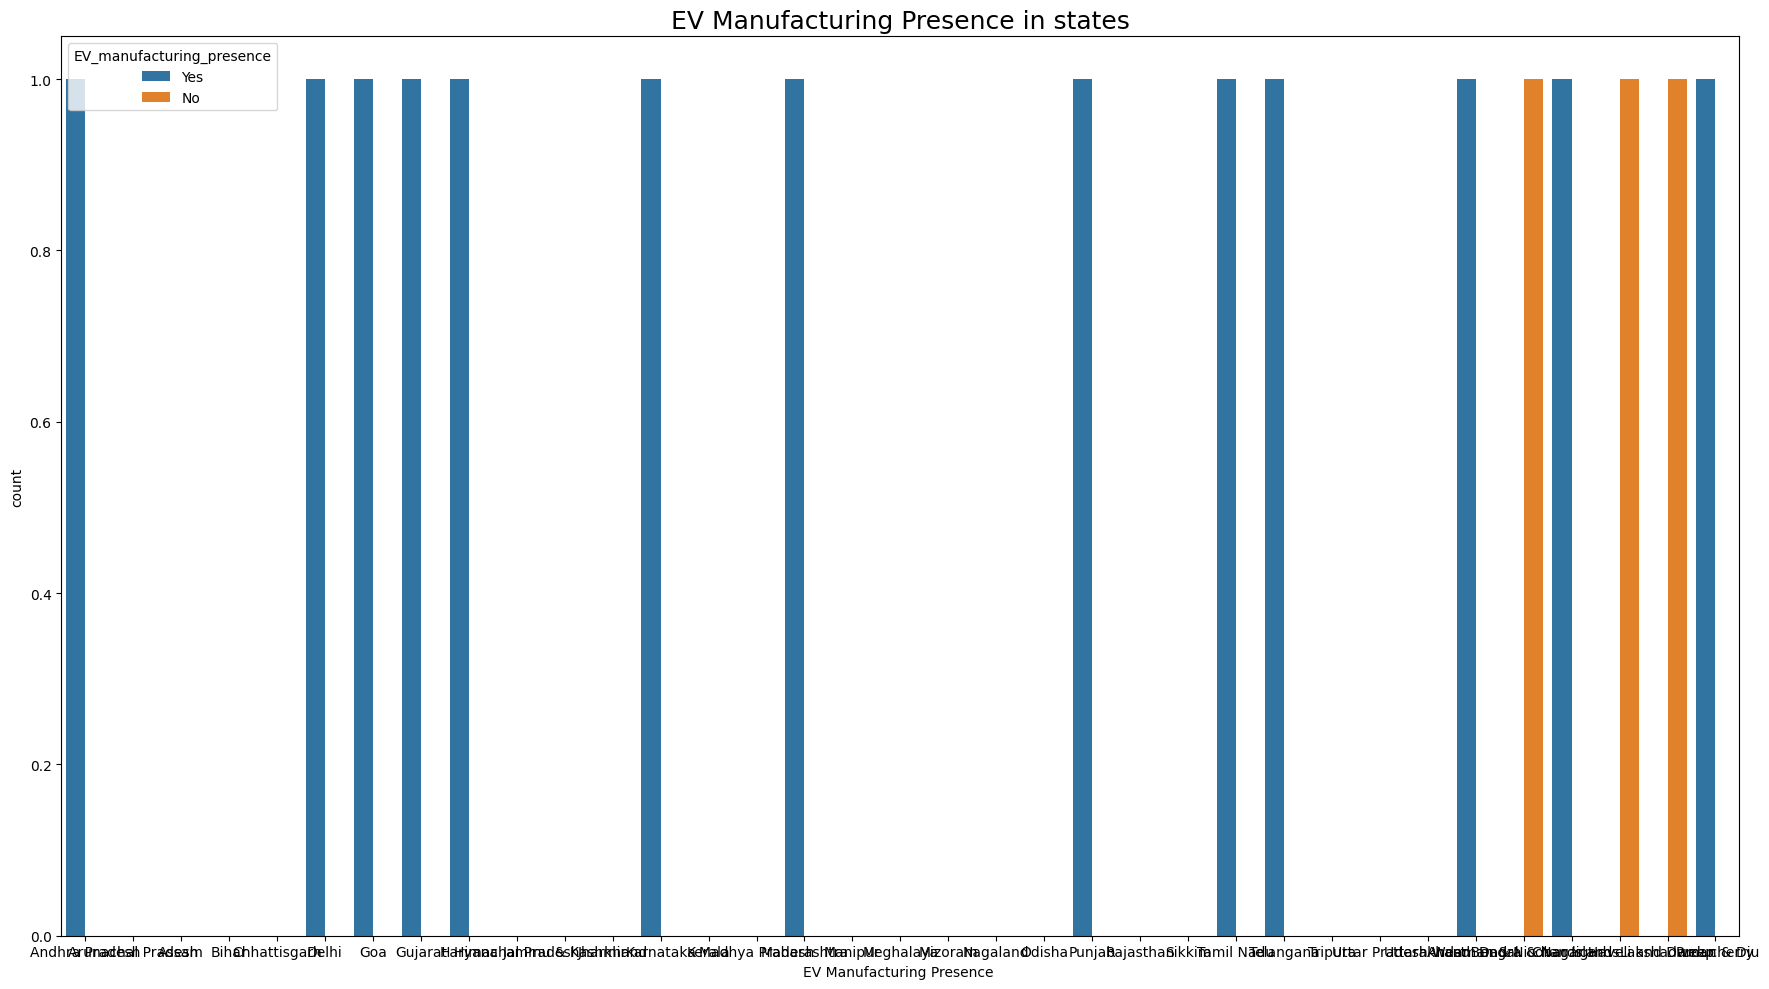

In [60]:
plt.figure(figsize=(18,10),facecolor='White')
sns.countplot(data=ev_dm,x='State/UT',hue='EV_manufacturing_presence')
plt.title("EV Manufacturing Presence in states",size=18)
plt.xlabel("EV Manufacturing Presence ",fontsize=10)
plt.tight_layout()
plt.show()

1. States with EV manufacturing presence mostly include Tier 1 and Tier 2 states like Andhra Pradesh, Delhi, Goa, Gujarat, Haryana, Karnataka, Maharashtra, Tamil Nadu, Telangana, Uttar Pradesh, West Bengal.
2. While states with no or very less EV manufacturing presence are Arunachal Pradesh, Chhattisgarh, Jharkhand, Madhya Pradesh, Odisha, Punjab, Sikkim, Uttarakhand due Agriculture and geography of the Tier 3 and Rural states. 

#### Impact of Power supply on EV Penetration

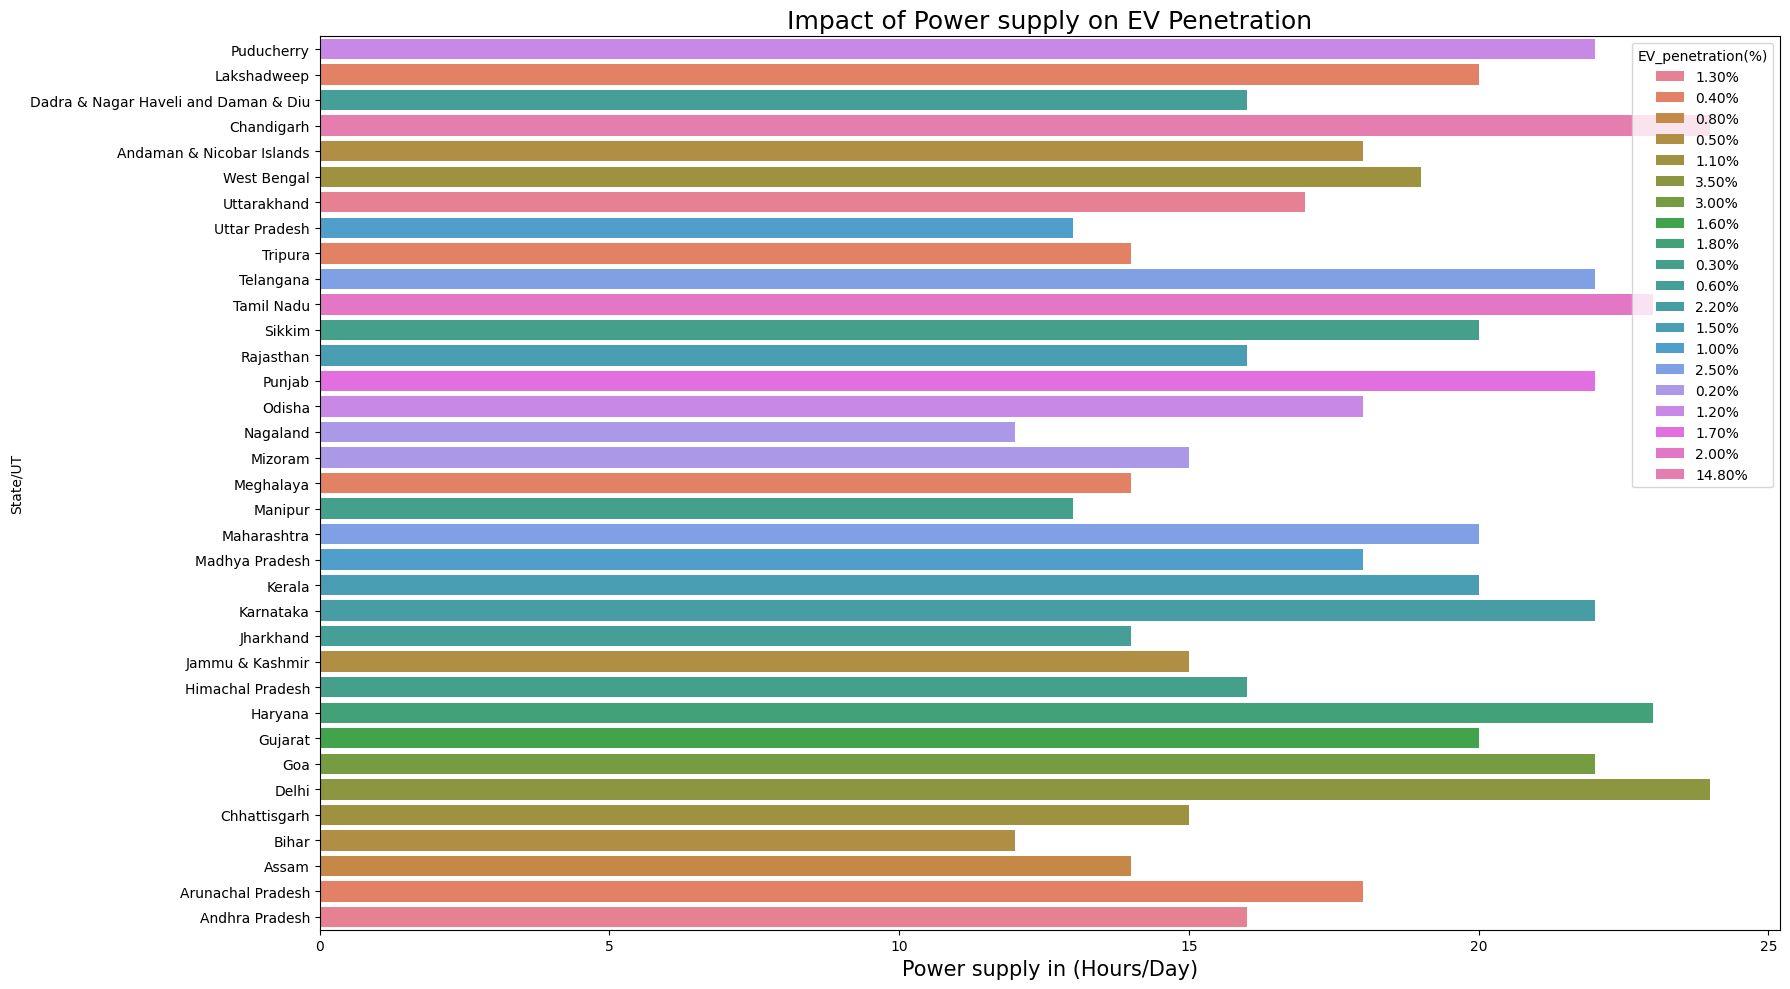

In [61]:
plt.figure(figsize=(18,10),facecolor='White')
sns.barplot(data=ev_dm, x='power_supply_quality(Hours/Day)', y='State/UT',hue='EV_penetration(%)')
plt.gca().invert_yaxis()
plt.title("Impact of Power supply on EV Penetration",size=18)
plt.xlabel("Power supply in (Hours/Day)",fontsize=15)
plt.ylabel("State/UT",fontsize=10)
plt.tight_layout()
plt.show()

1. States like Delhi, Goa, and Haryana with power supply above 22 hours/day show high EV penetration, indicating reliable electricity boosts adoption.

2. Telangana and Tamil Nadu also demonstrate strong EV penetration with good power availability.

3. Uttar Pradesh, Nagaland, and Bihar with power supply below 15 hours/day show low to moderate EV uptake, hinting that inconsistent electricity may hinder EV use.

4. Andaman & Nicobar Islands and Chandigarh have moderate power supply but relatively high EV penetration, suggesting urban focus and infrastructure planning play a role too.

5. States like Manipur, Mizoram, and Odisha show limited EV penetration despite decent power supply, highlighting that power alone isn't sufficient—awareness and infrastructure also matter.

## Data Processing

In [62]:
# checking null values

ev_dm.isnull().sum() 

State/UT                               0
Tier                                   0
per_capita_income                      0
no_of_graduates(%)                     0
no_of_postgraduates(%)                 0
no_of_informal_workers(%)              0
age_group30-40(%)                      0
EV_penetration(%)                      0
charging_stations                      0
EV_manufacturing_presence             19
power_supply_quality(Hours/Day)        0
urban/rural_classification(%)          0
vehicle_ownership_rate(2W/4W in %)     0
dtype: int64

In [63]:
# imputing Null values with Mode

print(ev_dm.EV_manufacturing_presence.mode())

0    Yes
Name: EV_manufacturing_presence, dtype: object


In [64]:
ev_dm.columns=ev_dm.columns.str.strip()
ev_dm.loc[ev_dm['EV_manufacturing_presence'].isnull()]

,State/UT,Tier,per_capita_income,no_of_graduates(%),no_of_postgraduates(%),no_of_informal_workers(%),age_group30-40(%),EV_penetration(%),charging_stations,EV_manufacturing_presence,power_supply_quality(Hours/Day),urban/rural_classification(%),vehicle_ownership_rate(2W/4W in %)
1,Arunachal Pradesh,3,"1,64,105",28%,8%,62%,22%,0.40%,5,NaN,18,"Urban - 18%, Rural - 82%","2W - 85%, 4W - 5%"
2,Assam,2,"1,18,504",25%,7%,70%,15%,0.80%,86,NaN,14,"Urban - 20%, Rural - 80%","2W - 78%, 4W - 12%"
3,Bihar,3,"54,111",20%,5%,80%,10%,0.50%,124,NaN,12,"Urban - 12%, Rural - 88%","2W - 82%, 4W - 8%"
4,Chhattisgarh,2,"1,33,898",25%,6%,69%,16%,1.10%,149,NaN,15,"Urban - 22%, Rural - 78%","2W - 76%, 4W - 16%"
9,Himachal Pradesh,3,"1,77,064",29%,8%,63%,19%,0.30%,36,NaN,16,"Urban - 22%, Rural - 78%","2W - 85%, 4W - 6%"
10,Jammu & Kashmir,3,"1,36,771",18%,4%,78%,12%,0.50%,47,NaN,15,"Urban - 15%, Rural - 85%","2W - 80%, 4W - 10%"
11,Jharkhand,3,"91,874",18%,4%,78%,11%,0.60%,135,NaN,14,"Urban - 17%, Rural - 83%","2W - 75%, 4W - 15%"
13,Kerala,2,"2,33,855",35%,12%,53%,22%,1.50%,192,NaN,20,"Urban - 55%, Rural - 45%","2W - 80%, 4W - 18%"
14,Madhya Pradesh,2,"1,40,583",22%,6%,72%,16%,1.00%,341,NaN,18,"Urban - 18%, Rural - 82%","2W - 75%, 4W - 20%"
16,Manipur,3,"91,560",20%,5%,75%,13%,0.30%,17,NaN,13,"Urban - 12%, Rural - 88%","2W - 90%, 4W - 7%"


In [65]:
ev_dm.loc[ev_dm['EV_manufacturing_presence'].isnull()==True,'EV_manufacturing_presence']='Yes'

In [66]:
ev_dm.loc[ev_dm['EV_manufacturing_presence'].isnull()] #null values imputed

,State/UT,Tier,per_capita_income,no_of_graduates(%),no_of_postgraduates(%),no_of_informal_workers(%),age_group30-40(%),EV_penetration(%),charging_stations,EV_manufacturing_presence,power_supply_quality(Hours/Day),urban/rural_classification(%),vehicle_ownership_rate(2W/4W in %)


In [67]:
# checking duplicated

ev_dm.duplicated().sum()

0

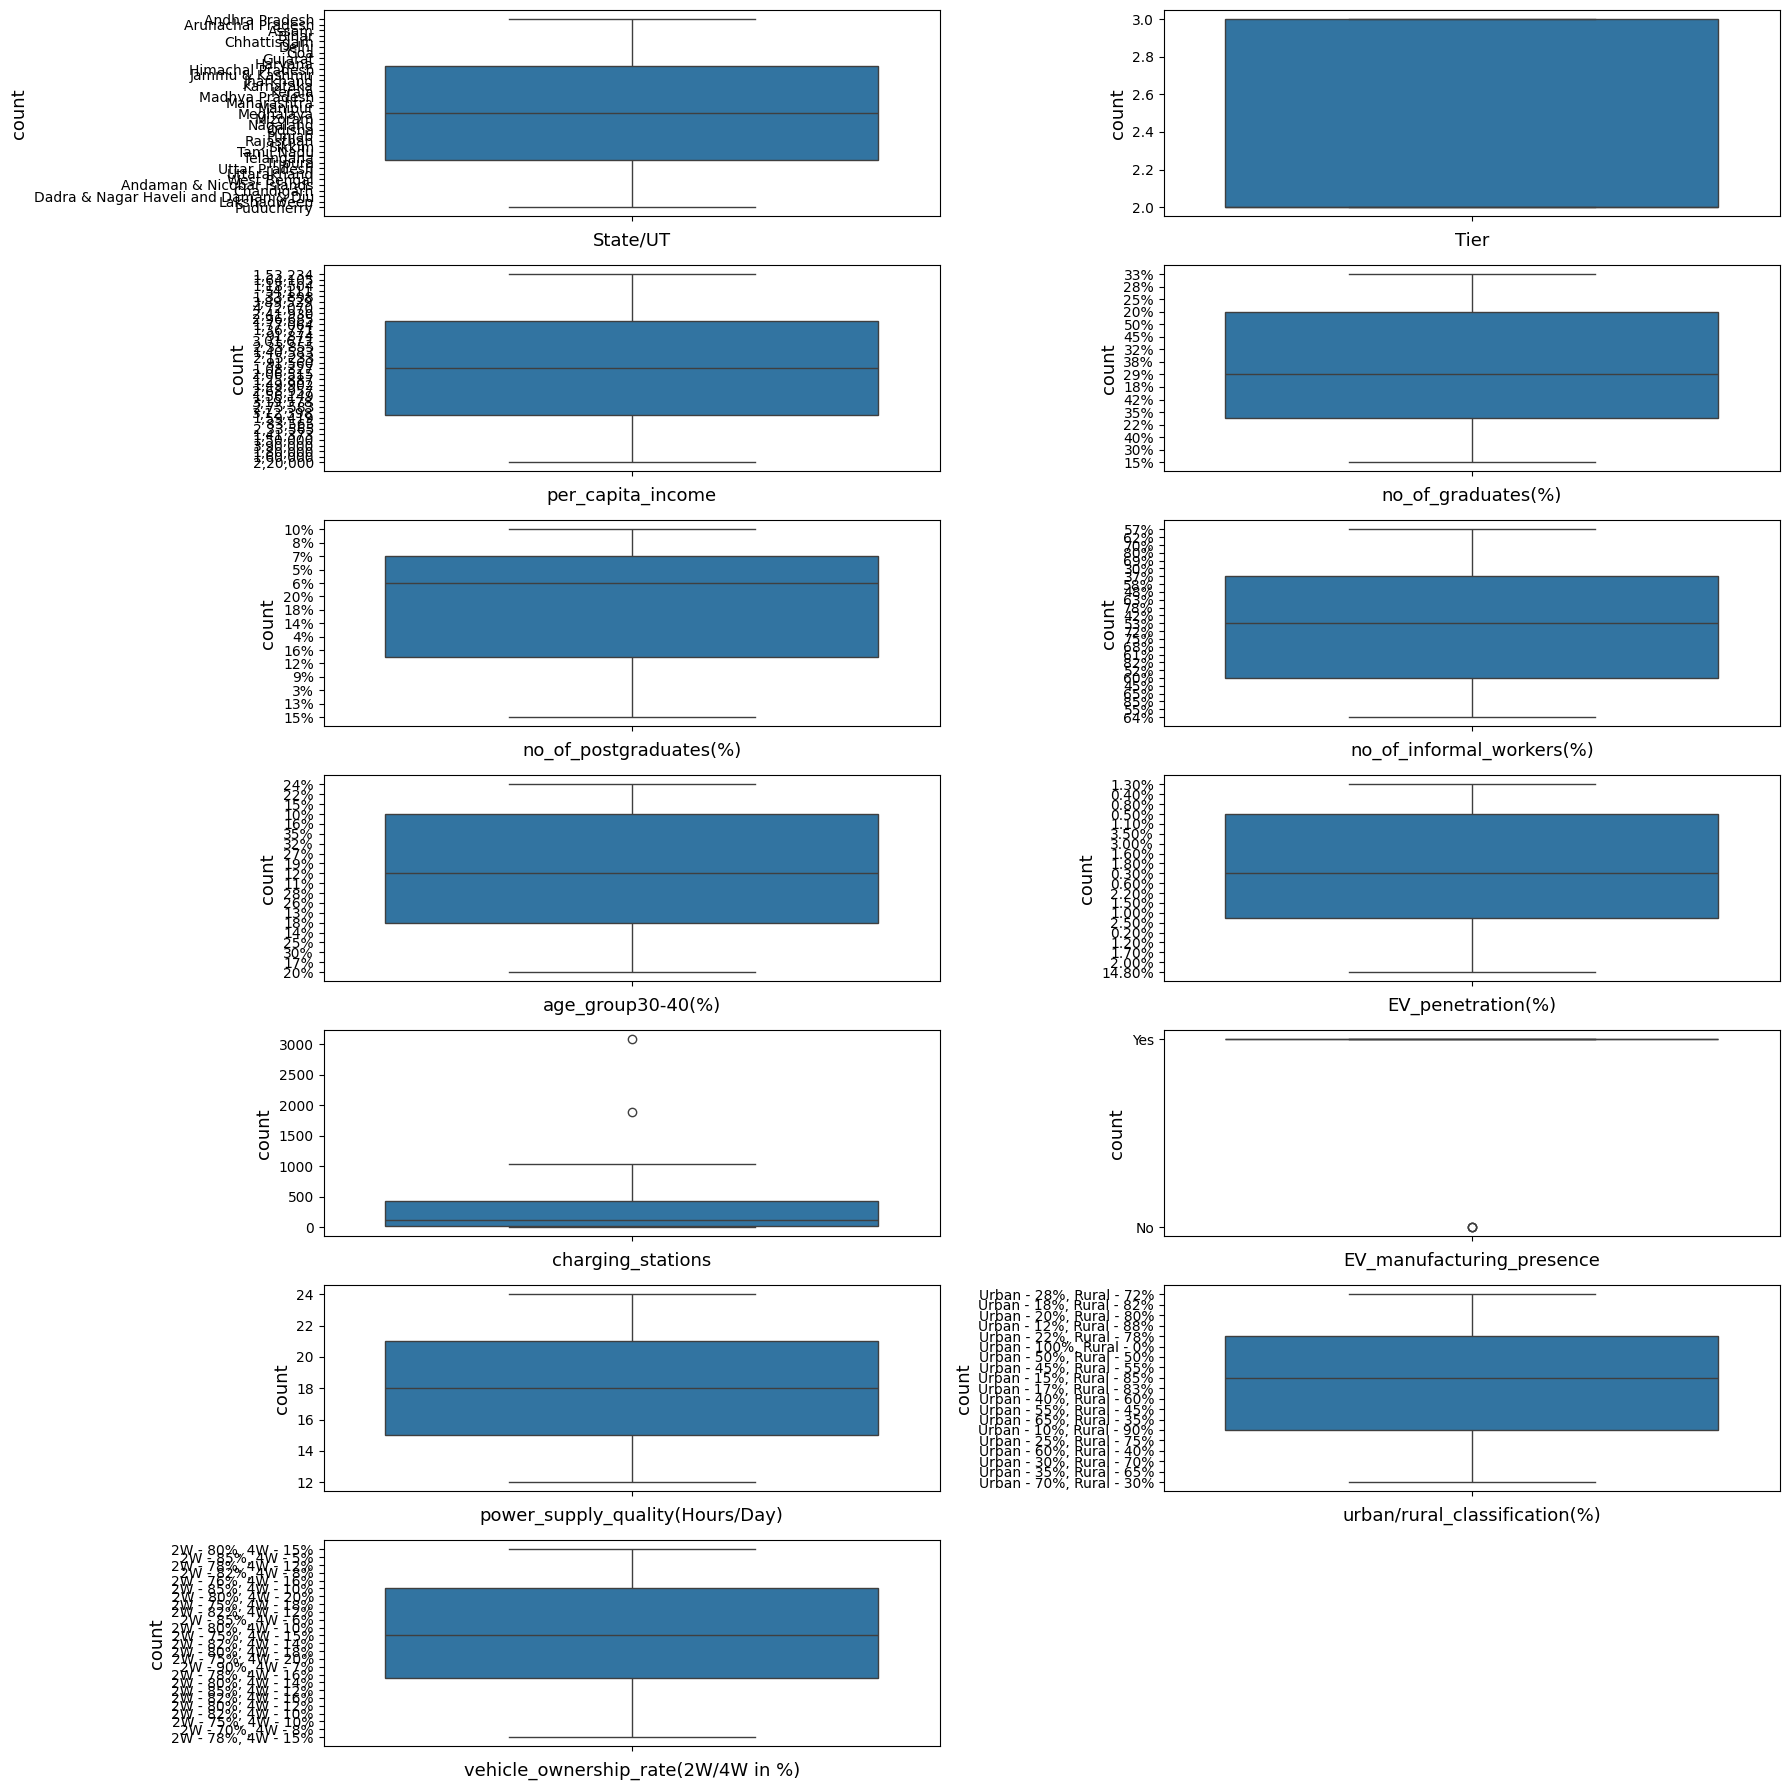

In [68]:
#checking outliers

# checking for outliers as k means is highely impacted by outliers

plt.figure(figsize=(18,18),facecolor='white')
columnnum=1

for column in ev_dm:
    if columnnum<=13:
        ax=plt.subplot(7,2,columnnum)
        sns.boxplot(ev_dm[column])
        plt.xlabel(column,fontsize=13)
        plt.ylabel('count',fontsize=13)
    columnnum+=1
plt.tight_layout()


<Axes: xlabel='charging_stations', ylabel='Count'>

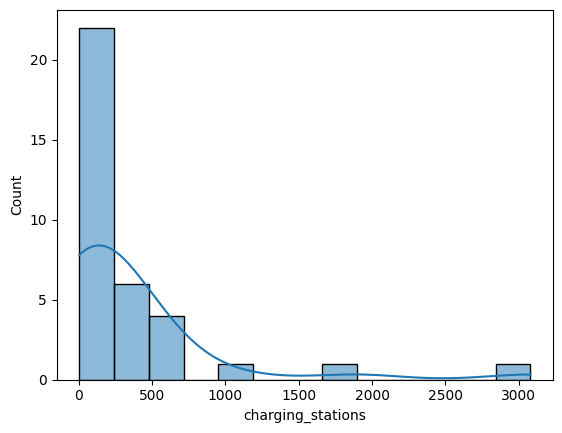

In [69]:
# checking the distribution of 'charging_station' column to impute the outliers

sns.histplot(data=ev_dm['charging_stations'],kde=True)

Graph shows highly positively skewed data hence we will use IQR method to impute the outliers.

In [70]:
Q1=ev_dm['charging_stations'].quantile(0.25)
print(Q1)
Q3=ev_dm['charging_stations'].quantile(0.75)
print(Q3)
IQR=Q3-Q1
print(IQR)
upper_limit=Q3+1.5*IQR
print(upper_limit)
lower_limit=Q1-1.5*IQR
print(lower_limit)

19.0
433.0
414.0
1054.0
-602.0


In [71]:
ev_dm.loc[ev_dm['charging_stations']<lower_limit] # no outliers in the -ve direction

,State/UT,Tier,per_capita_income,no_of_graduates(%),no_of_postgraduates(%),no_of_informal_workers(%),age_group30-40(%),EV_penetration(%),charging_stations,EV_manufacturing_presence,power_supply_quality(Hours/Day),urban/rural_classification(%),vehicle_ownership_rate(2W/4W in %)


In [72]:
ev_dm.loc[ev_dm['charging_stations']>upper_limit] #outliers in the +ve direction

,State/UT,Tier,per_capita_income,no_of_graduates(%),no_of_postgraduates(%),no_of_informal_workers(%),age_group30-40(%),EV_penetration(%),charging_stations,EV_manufacturing_presence,power_supply_quality(Hours/Day),urban/rural_classification(%),vehicle_ownership_rate(2W/4W in %)
5,Delhi,2,"3,89,529",50%,20%,30%,35%,3.50%,1886,Yes,24,"Urban - 100%, Rural - 0%","2W - 85%, 4W - 10%"
15,Maharashtra,2,"2,15,233",40%,12%,48%,26%,2.50%,3079,Yes,20,"Urban - 65%, Rural - 35%","2W - 80%, 4W - 15%"


In [73]:
ev_dm.loc[ev_dm['charging_stations'] > upper_limit, 'charging_stations'] = 1054.0

In [74]:
ev_dm.loc[ev_dm['charging_stations']>upper_limit] #outliers imputed

,State/UT,Tier,per_capita_income,no_of_graduates(%),no_of_postgraduates(%),no_of_informal_workers(%),age_group30-40(%),EV_penetration(%),charging_stations,EV_manufacturing_presence,power_supply_quality(Hours/Day),urban/rural_classification(%),vehicle_ownership_rate(2W/4W in %)


### Conversion of categorical veriable

In [75]:
# Clean column names

percent_columns = ['no_of_graduates(%)','no_of_postgraduates(%)','no_of_informal_workers(%)',
        'age_group30-40(%)','EV_penetration(%)',]

for col in percent_columns:
    ev_dm[col] = ev_dm[col].astype(str).str.replace('%', '', regex=False).astype(float)


In [76]:

#Extracting urban and rural percentages
ev_dm[['Urban (%)', 'Rural (%)']] = ev_dm['urban/rural_classification(%)'].str.extract(r'Urban\s*-\s*(\d+)%.*Rural\s*-\s*(\d+)%')
ev_dm['Urban (%)'] = pd.to_numeric(ev_dm['Urban (%)'], errors='coerce')
ev_dm['Rural (%)'] = pd.to_numeric(ev_dm['Rural (%)'], errors='coerce')

#Extract 2W and 4W vehicle ownership percentages
ev_dm[['2W (%)', '4W (%)']] = ev_dm['vehicle_ownership_rate(2W/4W in %)'].str.extract(r'2W\s*-\s*(\d+)%.*4W\s*-\s*(\d+)%')
ev_dm['2W (%)'] = pd.to_numeric(ev_dm['2W (%)'], errors='coerce')
ev_dm['4W (%)'] = pd.to_numeric(ev_dm['4W (%)'], errors='coerce')


In [77]:
# dropping the maine columns 

ev_dm.drop(columns=[
    'urban/rural_classification(%)', 
    'vehicle_ownership_rate(2W/4W in %)'
], inplace=True)

In [78]:
# renaming the new columns

ev_dm.rename(columns={'Urban (%)':'urban_area_ppl(%)','Rural (%)':'rural_area_ppl(%)',
                     '2W (%)':'veh_ownership_%(2W)','4W (%)':'veh_ownership_%(4W)'},inplace=True)

In [79]:
ev_dm.head(2)

,State/UT,Tier,per_capita_income,no_of_graduates(%),no_of_postgraduates(%),no_of_informal_workers(%),age_group30-40(%),EV_penetration(%),charging_stations,EV_manufacturing_presence,power_supply_quality(Hours/Day),urban_area_ppl(%),rural_area_ppl(%),veh_ownership_%(2W),veh_ownership_%(4W)
0,Andhra Pradesh,2,"1,53,234",33.0,10.0,57.0,24.0,1.3,421,Yes,16,28,72,80,15
1,Arunachal Pradesh,3,"1,64,105",28.0,8.0,62.0,22.0,0.4,5,Yes,18,18,82,85,5


### Scaling

In [80]:
from sklearn.preprocessing import StandardScaler

#Separating numeric and non-numeric data
numeric_cols = ev_dm.select_dtypes(include='number').columns
non_numeric_cols = ev_dm.select_dtypes(exclude='number').columns

#Scaling numeric columns only
scaler = StandardScaler()
ev_dm_scaled = ev_dm.copy()
ev_dm_scaled[numeric_cols] = scaler.fit_transform(ev_dm[numeric_cols])


### Model Creation (Segmentation using K Means)

In [81]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [82]:
ev_dm

,State/UT,Tier,per_capita_income,no_of_graduates(%),no_of_postgraduates(%),no_of_informal_workers(%),age_group30-40(%),EV_penetration(%),charging_stations,EV_manufacturing_presence,power_supply_quality(Hours/Day),urban_area_ppl(%),rural_area_ppl(%),veh_ownership_%(2W),veh_ownership_%(4W)
0,Andhra Pradesh,2,"1,53,234",33.0,10.0,57.0,24.0,1.3,421,Yes,16,28,72,80,15
1,Arunachal Pradesh,3,"1,64,105",28.0,8.0,62.0,22.0,0.4,5,Yes,18,18,82,85,5
2,Assam,2,"1,18,504",25.0,7.0,70.0,15.0,0.8,86,Yes,14,20,80,78,12
3,Bihar,3,"54,111",20.0,5.0,80.0,10.0,0.5,124,Yes,12,12,88,82,8
4,Chhattisgarh,2,"1,33,898",25.0,6.0,69.0,16.0,1.1,149,Yes,15,22,78,76,16
5,Delhi,2,"3,89,529",50.0,20.0,30.0,35.0,3.5,1054,Yes,24,100,0,85,10
6,Goa,2,"4,72,070",45.0,18.0,37.0,32.0,3.0,44,Yes,22,50,50,80,20
7,Gujarat,2,"2,41,930",32.0,10.0,58.0,22.0,1.6,476,Yes,20,45,55,75,18
8,Haryana,2,"2,96,685",38.0,14.0,48.0,27.0,1.8,377,Yes,23,50,50,82,12
9,Himachal Pradesh,3,"1,77,064",29.0,8.0,63.0,19.0,0.3,36,Yes,16,22,78,85,6


In [83]:
#numeric data for PCA and Clustering

x= ev_dm_scaled.select_dtypes(include='number') 


In [84]:
# plotting a graph to find elbow point to get optimal no of clusters


inertia=[]
K_range = range(1, 11)

for k in K_range:
    kmeans=KMeans(n_clusters=k, random_state=52)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

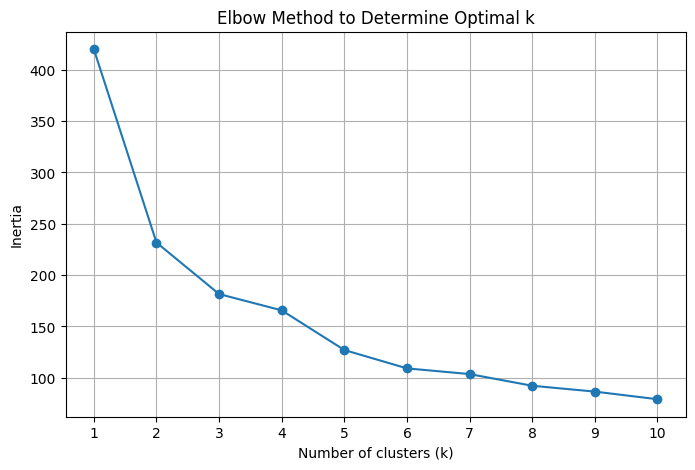

In [85]:
# plotting graph to vizualize the elbow curve

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(K_range)
plt.show()

We can see the sharp decrease at 3 and it is getting flat hence the optimal no of clusters should be 3

In [86]:
# Fitting  KMeans on original data
kmeans = KMeans(n_clusters=3, random_state=52)
y_kmeans = kmeans.fit_predict(x)


In [87]:
# Fitting PCA on original data (12D to 2D)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

In [88]:
# Transforming the cluster centroids into the same PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

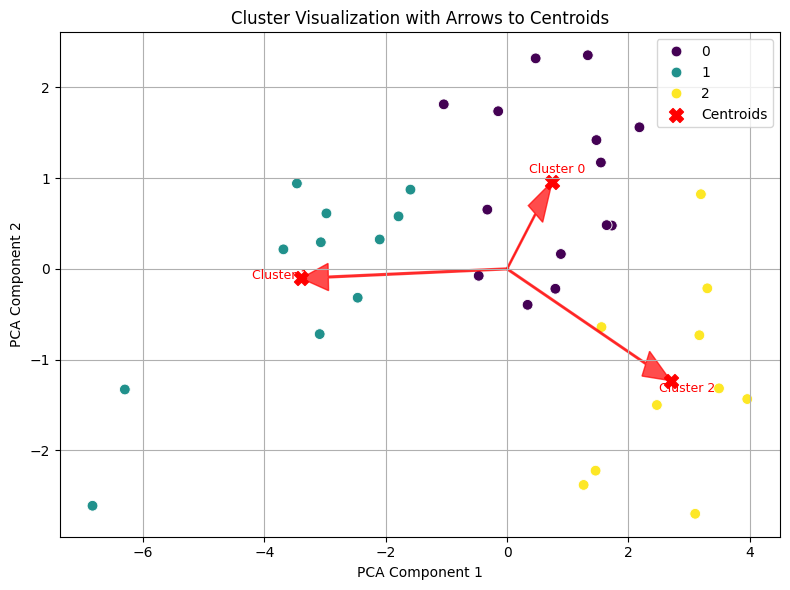

In [89]:
# Plotting the scatterplot for the veriables
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y_kmeans, palette='viridis', s=60)


# Plot cluster centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            c='red', s=100, marker='X', label='Centroids')


# Add arrows from origin to each centroid
for i, (cx, cy) in enumerate(centroids_pca):
    plt.arrow(0, 0, cx, cy, color='red', alpha=0.7, width=0.02, 
              head_width=0.3, length_includes_head=True)
    plt.text(cx * 1.1, cy * 1.1, f'Cluster {i}', color='red', fontsize=9, ha='center')

plt.title('Cluster Visualization with Arrows to Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Insights

The three-cluster PCA visualization clearly shows a structured segmentation of states based on their EV-readiness and socio-economic profiles.

    Cluster 1 (leftmost group, largely consisting of Tier 3 states like Bihar, Jharkhand, Nagaland) exhibits low per capita income (e.g., Bihar at ₹54,111) and high informal workforce percentages (often >70%), indicating lower affordability and infrastructure support for EV adoption.
    
    Cluster 0 (upper center) includes a mix of developing Tier 2 states such as Karnataka and Telangana, showing moderate to high EV penetration (2–3.5%) and good education and urbanization levels, signifying a transition phase toward stronger EV ecosystems.
    
    Cluster 2 (bottom right), with Delhi, Goa, Chandigarh, etc., represents highly developed, urbanized regions with per capita income exceeding ₹3–4 lakhs, strong EV penetration (up to 14.8%), and high postgraduate percentages (up to 20%). These regions are clear leaders in EV readiness.

EV Penetration Correlation: States like Delhi (3.5%), Chandigarh (14.8%), Telangana (2.5%), and Maharashtra (2.5%) show both high EV penetration and high urban population percentages (60–100%), indicating a strong urban-infrastructure dependency for EV adoption. On the contrary, rural-dominated states like Bihar (88% rural), Jharkhand (83%), and Manipur (88%) have EV penetration below 1%, showing infrastructural and economic limitations.

Charging Infrastructure vs EV Penetration: While Maharashtra and Karnataka both have over 1000 charging stations, their EV penetration rates differ (2.5% vs. 2.2%), suggesting other factors like population size, vehicular ownership, and policy initiatives are also at play.Some high-penetration UTs like Chandigarh show disproportionately high EV penetration with minimal infrastructure (20 stations), indicating dense urban usage and policy efficiency.

Demographic and Education Linkage: The cluster containing Delhi, Chandigarh, Goa shows higher proportions of graduates/postgraduates (≥45% and 18–20%), reflecting a possible link between education levels and technology adoption like EVs.Younger age groups (30–40%) also show higher percentages (Delhi 35%, Chandigarh 35%), suggesting youth-driven adoption in progressive markets.

Vehicular Ownership Trends: Clusters with higher 4W ownership (Goa 20%, Rajasthan 20%, Maharashtra 15%) align with better income and EV penetration, indicating market maturity.In contrast, states with high 2W ownership but low 4W (e.g., Uttar Pradesh, 85% 2W and 12% 4W) reflect two-wheeler dominant mobility, potentially benefiting from 2W EV policy focus.

